<a href="https://colab.research.google.com/github/WGaitanidis/Grp5_Data_Analysis_Visualisation/blob/main/Grp5_Data_Analysis_Sleep_Cognitive_Abilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the project
* by Louis Chambaud, Wasilios Gaitanidis and Alexander Renz
* M.Sc. Global Management & Digital Competencies
* Summer Term 2023
* ESB Business School, Reutlingen University
* Prof. Dr. Schweitzer
* The project involves analyzing a dataset consisting of various measurements related to brain activity and sleep patterns.
* The dataset was processed and explored using Python and popular libraries such as Pandas, NumPy, and Matplotlib.
* Exploratory data analysis was conducted to gain insights into the relationships between different variables and identify patterns in the data.
* Regression analysis was performed to model the relationship between research date and peak brain level for different users, using curve fitting techniques.
* Multiple linear regression was used to examine the impact of research date and sleep time on peak brain level.
* Clustering analysis techniques, including k-means and hierarchical clustering, were applied to uncover patterns and groupings within the dataset.
* Visualizations, such as scatter plots, bar charts, regression plots, and dendrograms, were created to facilitate data interpretation and communication of findings.
* **The project aimed to provide valuable insights into brain activity and sleep patterns, contributing to a better understanding of the factors influencing peak brain level.**



# Import the required libraries
* numpy is used for numerical operations
* pandas is used for data manipulation and analysis
* matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Google Colab Drive Module
The google.colab library's drive module is used to mount your Google Drive as a network mapped drive in the runtime's virtual machine. This will be used to load data from your Google Drive or to save files to your Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import the datasets
* These lines of code are preparing our data for the analysis. 
* They load the data from the specified file paths on our Google Drive into pandas DataFrames, which are data structures that make data manipulation in Python straightforward.

In [3]:
# Define the file paths where the CSV data files are located in our Google Drive. 
# The file_path variables are string type variables that store the path to the data files for each user.
file_path_U1 = "/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U1.csv"
file_path_U2 = "/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U2.csv"
file_path_U3 = "/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U3.csv"

# Define the delimiter used in our CSV files. 
# A delimiter is a character that separates values in the data files.
# In this case, ';' is used as a delimiter.
delimiter = ';'

# Use the pandas function read_csv to load the data from the CSV files into pandas DataFrames. 
# The 'sep' parameter is used to specify the delimiter and the 'encoding' parameter is used to specify the encoding of the file.
df_ori_U1 = pd.read_csv(file_path_U1, sep=delimiter, encoding='utf-8')
df_ori_U2 = pd.read_csv(file_path_U2, sep=delimiter, encoding='utf-8')
df_ori_U3 = pd.read_csv(file_path_U3, sep=delimiter, encoding='utf-8')

In [4]:
# Set the option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [5]:
# Display the head (first five rows) of DataFrame of User 1
df_ori_U1.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord
0,1,0,Tuesday,NaN,NaN,01.03.23 00:05,12:05 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Wednesday,01.03.23 07:03,7:03 AM,02.03.23 00:15,12:15 AM,06:58:46,397.0,17:11:37,1031.0,13.0,3.30%,134.0,33.70%,208.0,52.50%,42.0,10.50%,385.0,160.0,252.0,376.0,680.0,460.0,325.0,150.0
2,1,2,Thursday,02.03.23 07:46,7:46 AM,03.03.23 01:11,1:11 AM,07:31:01,436.0,17:25:08,1045.0,67.0,15.50%,70.0,16.00%,215.0,49.30%,84.0,19.20%,469.0,169.0,320.0,414.0,791.0,536.0,512.0,205.0
3,1,3,Friday,03.03.23 09:38,9:38 AM,04.03.23 00:40,12:40 AM,08:26:42,488.0,15:02:19,902.0,8.0,1.60%,119.0,24.40%,306.0,62.70%,55.0,11.40%,490.0,169.0,350.0,451.0,832.0,572.0,512.0,205.0
4,1,4,Saturday,04.03.23 08:21,8:21 AM,04.03.23 23:46,11:46 PM,07:40:39,420.0,15:25:18,925.0,2.0,0.50%,94.0,22.40%,272.0,64.80%,52.0,12.40%,497.0,210.0,374.0,472.0,832.0,567.0,548.0,189.0


In [6]:
# Display the head (first five rows) of DataFrame of User 1
df_ori_U2.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord
0,1,0,Tuesday,NaN,NaN,01.03.23 00:04,12:04 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Wednesday,01.03.23 07:25,7:25 AM,01.03.23 23:49,11:49 PM,07:21:34,441.0,16:23:56,983.0,108.0,24.40%,29.0,6.70%,167.0,37.80%,137.0,31.10%,178.0,154.0,229.0,180.0,151.0,206.0,174.0,150.0
2,1,2,Thursday,02.03.23 07:45,7:45 AM,02.03.23 23:20,11:20 PM,07:55:34,475.0,15:35:04,935.0,113.0,23.70%,88.0,18.60%,186.0,39.20%,88.0,18.60%,229.0,155.0,282.0,205.0,227.0,257.0,266.0,186.0
3,1,3,Friday,03.03.23 08:14,8:14 AM,04.03.23 00:47,12:47 AM,08:54:18,534.0,16:32:29,992.0,52.0,9.70%,57.0,10.80%,310.0,58.10%,115.0,21.50%,342.0,186.0,342.0,299.0,314.0,404.0,479.0,206.0
4,1,4,Saturday,04.03.23 08:52,8:52 AM,05.03.23 01:40,1:40 AM,08:05:43,485.0,16:47:24,1007.0,92.0,19.00%,39.0,8.00%,296.0,61.00%,58.0,12.00%,338.0,195.0,311.0,295.0,274.0,408.0,439.0,234.0


In [7]:
# Display the head (first five rows) of DataFrame of User 1
df_ori_U3.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord
0,1,0,Tuesday,NaN,NaN,01.03.23 01:10,1:10 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Wednesday,01.03.23 08:38,8:38 AM,02.03.23 03:41,3:41 AM,07:27:16,447.0,19:03:33,1143.0,9.0,2.10%,82.0,18.30%,286.0,63.90%,70.0,15.80%,226.0,178.0,241.0,219.0,261.0,220.0,333.0,150.0
2,1,2,Thursday,02.03.23 11:31,11:31 AM,03.03.23 01:12,1:12 AM,07:49:38,469.0,13:41:17,821.0,34.0,7.30%,84.0,17.80%,271.0,57.90%,80.0,17.00%,320.0,216.0,309.0,337.0,465.0,302.0,508.0,150.0
3,1,3,Friday,03.03.23 08:35,8:35 AM,04.03.23 01:13,1:13 AM,07:22:48,442.0,16:38:09,998.0,43.0,9.80%,64.0,14.40%,227.0,51.30%,108.0,24.50%,327.0,196.0,309.0,351.0,465.0,323.0,508.0,150.0
4,1,4,Saturday,04.03.23 08:18,8:18 AM,05.03.23 00:44,12:44 AM,07:04:54,424.0,16:25:37,985.0,43.0,10.10%,45.0,10.60%,247.0,58.20%,89.0,21.10%,333.0,204.0,298.0,350.0,473.0,319.0,518.0,177.0


# Prepare Data for further analysis

## Transforming percentages of sleep phases
* convert the percentage values into decimals
* remove the '%' character
* convert the string to a numerical type (in this case a float)

In [8]:
# List of variables that are in percentage format
variables_perc = ['awake_sleep_perc', 'REM_perc', 'light_core_sleep_perc', 'deep_sleep_perc']

# List of dataframes
dfs = [df_ori_U1, df_ori_U2, df_ori_U3]

# Iterate over the dataframes
for df in dfs:
    # Iterate over the percentage variables
    for var in variables_perc:
        # Remove the '%' character, convert the string to float, and divide by 100
        df[var] = df[var].str.rstrip('%').astype('float') / 100

## Calculating Growth rates
* calculating the growth rates for a list of variables 
* then adding those growth rates as new columns

In [9]:
# List of variables to calculate growth rates for
variables_growth = ['peak_brain_level', 'cat_lang', 'cat_prob_solv', 'cat_memory', 'cat_focus', 
             'cat_mental_agility', 'cat_emotion', 'cat_coord']

# List of dataframes
dfs = [df_ori_U1, df_ori_U2, df_ori_U3]

# Iterate over the dataframes
for i, df in enumerate(dfs):
    # Iterate over the variables
    for var in variables_growth:
        # Calculate the growth rate and add it as a new column
        df[f'{var}_growth'] = df[var].pct_change()

    # Update the dataframe in the list
    dfs[i] = df

## Remove Research Date 'Zero'
On day 0 of the research, no data on the Peak Brain game was entered, exclusively only the time at which one went to sleep, which is why the first line is removed from all three dataframes

In [10]:
# Remove the first line of the dataset because it contains Nans that prevent the realization of the multiple regression 
df_ori_U1_1=df_ori_U1.drop(0)
df_ori_U2_2=df_ori_U2.drop(0)
df_ori_U3_3=df_ori_U3.drop(0)

## Checking if all calculations worked correctly

In [11]:
# Display one DataFrame to check if all the calculations worked correctly
df_ori_U1_1.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth
1,1,1,Wednesday,01.03.23 07:03,7:03 AM,02.03.23 00:15,12:15 AM,06:58:46,397.0,17:11:37,1031.0,13.0,0.033,134.0,0.337,208.0,0.525,42.0,0.105,385.0,160.0,252.0,376.0,680.0,460.0,325.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,Thursday,02.03.23 07:46,7:46 AM,03.03.23 01:11,1:11 AM,07:31:01,436.0,17:25:08,1045.0,67.0,0.155,70.0,0.160,215.0,0.493,84.0,0.192,469.0,169.0,320.0,414.0,791.0,536.0,512.0,205.0,0.218182,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667
3,1,3,Friday,03.03.23 09:38,9:38 AM,04.03.23 00:40,12:40 AM,08:26:42,488.0,15:02:19,902.0,8.0,0.016,119.0,0.244,306.0,0.627,55.0,0.114,490.0,169.0,350.0,451.0,832.0,572.0,512.0,205.0,0.044776,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000
4,1,4,Saturday,04.03.23 08:21,8:21 AM,04.03.23 23:46,11:46 PM,07:40:39,420.0,15:25:18,925.0,2.0,0.005,94.0,0.224,272.0,0.648,52.0,0.124,497.0,210.0,374.0,472.0,832.0,567.0,548.0,189.0,0.014286,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049
5,1,5,Sunday,05.03.23 06:45,6:45 AM,06.03.23 00:21,12:21 AM,06:58:46,398.0,17:36:10,1056.0,4.0,0.011,70.0,0.177,286.0,0.718,37.0,0.094,500.0,190.0,363.0,478.0,825.0,581.0,528.0,213.0,0.006036,-0.095238,-0.029412,0.012712,-0.008413,0.024691,-0.036496,0.126984


##Merging the Dataset
* In this code, we define a function add_column that takes a DataFrame, a column name, and a value as inputs. 
* It adds a new column to the DataFrame with the specified name and fills it with the specified value using the assignment operation. 
* The function then returns the updated DataFrame. 
* We call this function for each of your DataFrames, adding the new column as required.

In [12]:
def add_column(df, column_name, value):
    """
    This function adds a new column to a pandas DataFrame with a specified value.
    """

    # DataFrame[column] = value adds a new column to the DataFrame 
    # and fills it with the specified value.
    df[column_name] = value

    return df

# Adding new columns to each DataFrame
df_ori_U1_1 = add_column(df_ori_U1_1, "is_U1", 1)
df_ori_U2_2 = add_column(df_ori_U2_2, "is_U2", 1)
df_ori_U3_3 = add_column(df_ori_U3_3, "is_U3", 1)

# Display one of the updated DataFrames to check if column was successfully added
df_ori_U1_1.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth,is_U1
1,1,1,Wednesday,01.03.23 07:03,7:03 AM,02.03.23 00:15,12:15 AM,06:58:46,397.0,17:11:37,1031.0,13.0,0.033,134.0,0.337,208.0,0.525,42.0,0.105,385.0,160.0,252.0,376.0,680.0,460.0,325.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,2,Thursday,02.03.23 07:46,7:46 AM,03.03.23 01:11,1:11 AM,07:31:01,436.0,17:25:08,1045.0,67.0,0.155,70.0,0.160,215.0,0.493,84.0,0.192,469.0,169.0,320.0,414.0,791.0,536.0,512.0,205.0,0.218182,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667,1
3,1,3,Friday,03.03.23 09:38,9:38 AM,04.03.23 00:40,12:40 AM,08:26:42,488.0,15:02:19,902.0,8.0,0.016,119.0,0.244,306.0,0.627,55.0,0.114,490.0,169.0,350.0,451.0,832.0,572.0,512.0,205.0,0.044776,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000,1
4,1,4,Saturday,04.03.23 08:21,8:21 AM,04.03.23 23:46,11:46 PM,07:40:39,420.0,15:25:18,925.0,2.0,0.005,94.0,0.224,272.0,0.648,52.0,0.124,497.0,210.0,374.0,472.0,832.0,567.0,548.0,189.0,0.014286,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049,1
5,1,5,Sunday,05.03.23 06:45,6:45 AM,06.03.23 00:21,12:21 AM,06:58:46,398.0,17:36:10,1056.0,4.0,0.011,70.0,0.177,286.0,0.718,37.0,0.094,500.0,190.0,363.0,478.0,825.0,581.0,528.0,213.0,0.006036,-0.095238,-0.029412,0.012712,-0.008413,0.024691,-0.036496,0.126984,1


* In the next step, we define a function merge_dataframes that takes three DataFrames as inputs and merges them vertically using the pd.concat function
* The function then returns the merged DataFrame. 
* We call this function with our three DataFrames as arguments and print the resulting DataFrame.

* This will concatenate the dataframes based on the index and will result in a dataframe with the same index repeated for each original dataframe. 

In [13]:
def merge_dataframes(df1, df2, df3):
    """
    This function merges three pandas DataFrames vertically (along rows).
    """

    # pd.concat([df1, df2, df3]) concatenates the DataFrames along the rows
    df = pd.concat([df1, df2, df3])

    # df.fillna(0) replaces any NaN values in the DataFrame with 0
    df = df.fillna(0)

    return df

# Merging the DataFrames
df = merge_dataframes(df_ori_U1_1, df_ori_U2_2, df_ori_U3_3)

# Display df
df

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,awake_time_in_min,awake_sleep_in_min,awake_sleep_perc,REM_in_min,REM_perc,light_core_sleep_in_min,light_core_sleep_perc,deep_sleep_in_min,deep_sleep_perc,peak_brain_level,cat_lang,cat_prob_solv,cat_memory,cat_focus,cat_mental_agility,cat_emotion,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth,is_U1,is_U2,is_U3
1,1,1,Wednesday,01.03.23 07:03,7:03 AM,02.03.23 00:15,12:15 AM,06:58:46,397.0,17:11:37,1031.0,13.0,0.033,134.0,0.337,208.0,0.525,42.0,0.105,385.0,160.0,252.0,376.0,680.0,460.0,325.0,150.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
2,1,2,Thursday,02.03.23 07:46,7:46 AM,03.03.23 01:11,1:11 AM,07:31:01,436.0,17:25:08,1045.0,67.0,0.155,70.0,0.160,215.0,0.493,84.0,0.192,469.0,169.0,320.0,414.0,791.0,536.0,512.0,205.0,0.218182,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667,1.0,0.0,0.0
3,1,3,Friday,03.03.23 09:38,9:38 AM,04.03.23 00:40,12:40 AM,08:26:42,488.0,15:02:19,902.0,8.0,0.016,119.0,0.244,306.0,0.627,55.0,0.114,490.0,169.0,350.0,451.0,832.0,572.0,512.0,205.0,0.044776,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000,1.0,0.0,0.0
4,1,4,Saturday,04.03.23 08:21,8:21 AM,04.03.23 23:46,11:46 PM,07:40:39,420.0,15:25:18,925.0,2.0,0.005,94.0,0.224,272.0,0.648,52.0,0.124,497.0,210.0,374.0,472.0,832.0,567.0,548.0,189.0,0.014286,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049,1.0,0.0,0.0
5,1,5,Sunday,05.03.23 06:45,6:45 AM,06.03.23 00:21,12:21 AM,06:58:46,398.0,17:36:10,1056.0,4.0,0.011,70.0,0.177,286.0,0.718,37.0,0.094,500.0,190.0,363.0,478.0,825.0,581.0,528.0,213.0,0.006036,-0.095238,-0.029412,0.012712,-0.008413,0.024691,-0.036496,0.126984,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,4,26,Sunday,26.03.23 08:37,8:37 AM,27.03.23 00:46,12:46 AM,07:35:19,455.0,16:09:23,969.0,39.0,0.085,61.0,0.134,298.0,0.655,58.0,0.126,675.0,465.0,481.0,601.0,655.0,712.0,846.0,622.0,0.019637,0.139706,-0.030242,0.047038,-0.015038,0.020057,-0.004706,0.001610,0.0,0.0,1.0
27,5,27,Monday,27.03.23 08:29,8:29 AM,28.03.23 00:37,12:37 AM,07:42:55,462.0,16:07:36,967.0,45.0,0.097,70.0,0.152,291.0,0.629,56.0,0.122,680.0,445.0,489.0,593.0,635.0,722.0,841.0,676.0,0.007407,-0.043011,0.016632,-0.013311,-0.030534,0.014045,-0.005910,0.086817,0.0,0.0,1.0
28,5,28,Tuesday,28.03.23 08:32,8:32 AM,29.03.23 00:08,12:08 AM,07:55:54,475.0,15:35:44,935.0,27.0,0.057,83.0,0.176,287.0,0.604,78.0,0.164,678.0,504.0,469.0,607.0,636.0,704.0,839.0,656.0,-0.002941,0.132584,-0.040900,0.023609,0.001575,-0.024931,-0.002378,-0.029586,0.0,0.0,1.0
29,5,29,Wednesday,29.03.23 06:33,6:33 AM,30.03.23 00:50,12:50 AM,06:24:39,384.0,18:17:15,1097.0,75.0,0.196,66.0,0.173,170.0,0.442,73.0,0.189,667.0,491.0,449.0,590.0,620.0,684.0,835.0,670.0,-0.016224,-0.025794,-0.042644,-0.028007,-0.025157,-0.028409,-0.004768,0.021341,0.0,0.0,1.0


# Basic Analysis

## Define custom font and color palette
At the start of our analysis, we define a custom font and color palette, so the design of the visualisations created in further steps matches to our presentation.


In [14]:
from matplotlib import font_manager

# Register the font with matplotlib (uploaded the .ttf document to the collab workspace)
font_manager.fontManager.addfont('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Fonts/Poppins-Regular.ttf')

# Set the font properties
font = {'family' : 'Poppins',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

# Define the color palette
colors = ["#7A6FC6", "#EB5647", "#36BEA6"]

# Set the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

## Basic Analysis for Brain Scores
### Looking at progress of brain score over research time

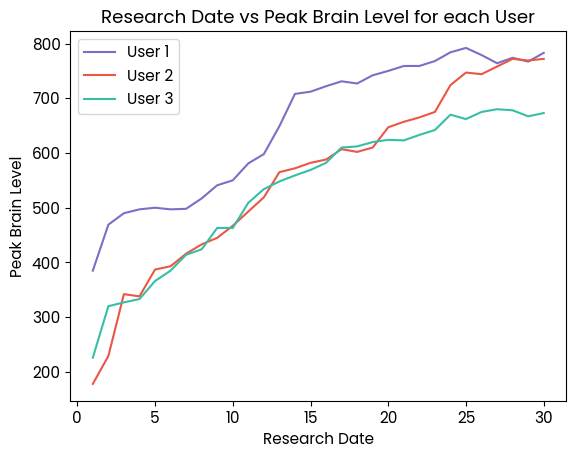

In [15]:
def plot_brain_scores(df):
    """
    This function creates a line plot of 'Research_Date' vs 'peak_brain_level' 
    for each user in the DataFrame.
    """
    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Plot the data for each user, using a different color for each user
    # The default marker for plot() is a line.

    # Extracting rows for User 1 and plotting
    df_U1 = df[df['is_U1'] == 1]
    ax.plot(df_U1['Research_Date'], df_U1['peak_brain_level'], label='User 1')
    
    # Extracting rows for User 2 and plotting
    df_U2 = df[df['is_U2'] == 1]
    ax.plot(df_U2['Research_Date'], df_U2['peak_brain_level'], label='User 2')
    
    # Extracting rows for User 3 and plotting
    df_U3 = df[df['is_U3'] == 1]
    ax.plot(df_U3['Research_Date'], df_U3['peak_brain_level'], label='User 3')

    # Adding a legend
    ax.legend()

    # Adding labels for the x and y axes
    ax.set_xlabel('Research Date')
    ax.set_ylabel('Peak Brain Level')

    # Adding a title
    ax.set_title('Research Date vs Peak Brain Level for each User')

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_brain_scores(df)

### Create plots for all the other Peak App Categories
This function makes use of the fact that you can iterate over a list of variable names and create a plot for each one.
* The function starts by defining a list of the specified variables. 
* It then iterates over this list, creating a new plot for each variable. 
* Within each plot, it creates a different line for each user. 
* The plot has the research date on the x-axis and the variable on the y-axis. The plots are displayed one after the other.

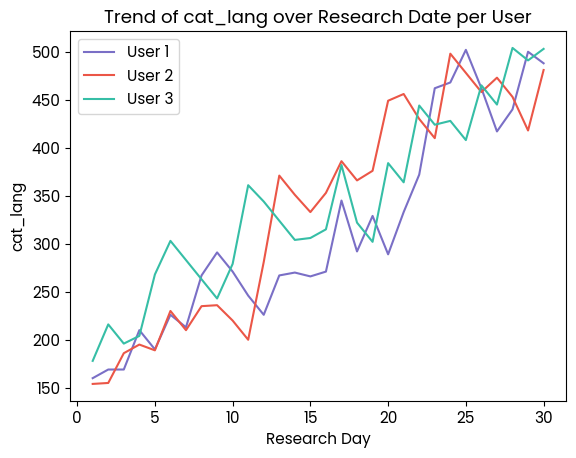

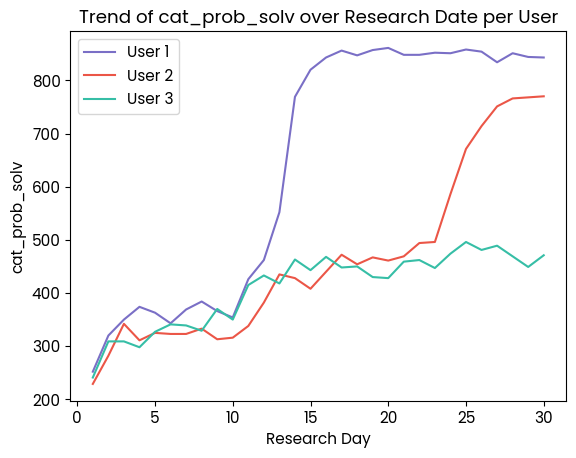

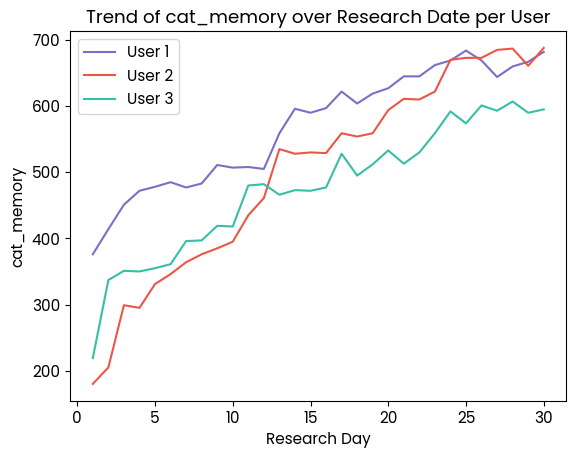

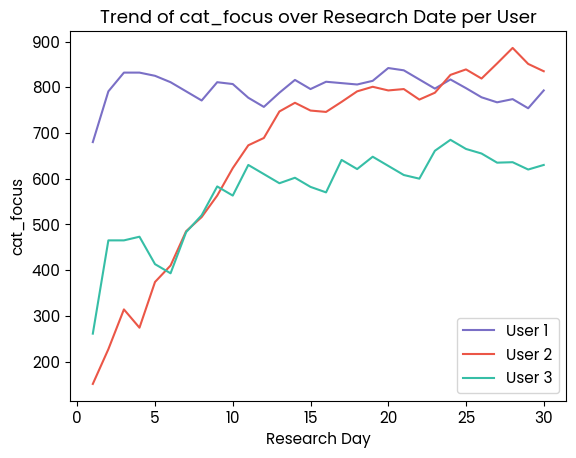

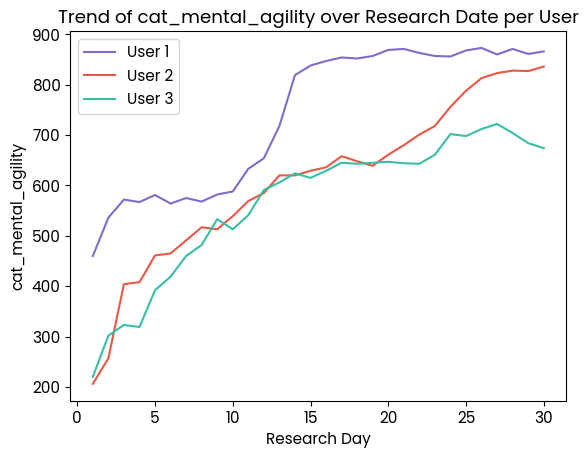

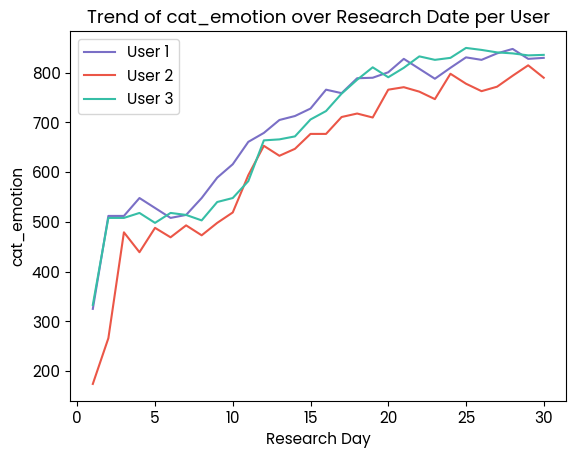

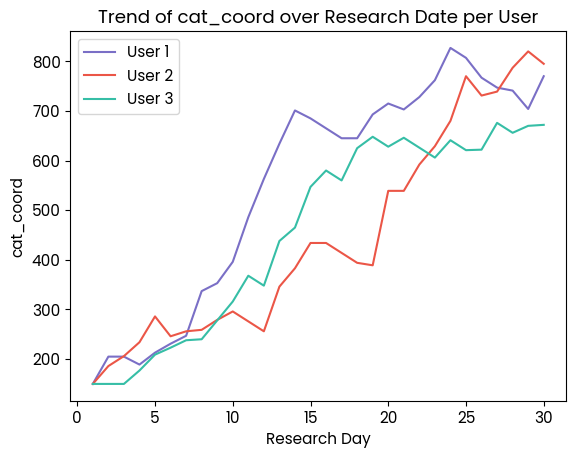

In [16]:
def create_plots_per_user(df):
    """
    This function creates a separate line plot for each specified variable with the research date on the x-axis 
    and the variable on the y-axis. It creates a different line for each user.
    """
    
    # List of variables to plot
    variables = ['cat_lang', 'cat_prob_solv', 'cat_memory', 'cat_focus', 
                 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    # List of users
    users = ['is_U1', 'is_U2', 'is_U3']

    # Dictionary for legend labels
    user_labels = {'is_U1': 'User 1', 'is_U2': 'User 2', 'is_U3': 'User 3'}

    # Iterate over the variables
    for var in variables:
        # Create a new figure
        plt.figure()

        # Iterate over the users
        for user in users:
            # Create a mask for the current user
            mask = df[user] == 1

            # Create a line plot for the current variable and user
            plt.plot(df.loc[mask, 'Research_Date'], df.loc[mask, var], label=user_labels[user])

        # Set the title, labels, and legend
        plt.title(f'Trend of {var} over Research Date per User')
        plt.xlabel('Research Day')
        plt.ylabel(var)
        plt.legend()

        # Save the plot as a .png file with a transparent background
        plt.savefig(f'/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_trend_{var}.png', 
                    format='png', 
                    dpi=300,
                    transparent=True)

        # Display the plot
        plt.show()

# Calling the function with the DataFrame
create_plots_per_user(df)

### Growth rates of peak brain level

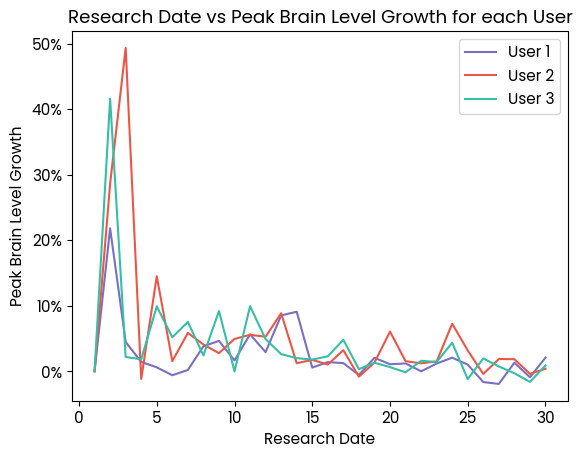

In [17]:
from matplotlib.ticker import FuncFormatter

def plot_brain_scores_growth(df):
    """
    This function creates a line plot of 'Research_Date' vs 'peak_brain_level_growth' 
    for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Plot the data for each user, using a different color for each user
    # The default marker for plot() is a line.

    # Extracting rows for User 1 and plotting
    df_U1 = df[df['is_U1'] == 1]
    ax.plot(df_U1['Research_Date'], df_U1['peak_brain_level_growth'], label='User 1')
    
    # Extracting rows for User 2 and plotting
    df_U2 = df[df['is_U2'] == 1]
    ax.plot(df_U2['Research_Date'], df_U2['peak_brain_level_growth'], label='User 2')
    
    # Extracting rows for User 3 and plotting
    df_U3 = df[df['is_U3'] == 1]
    ax.plot(df_U3['Research_Date'], df_U3['peak_brain_level_growth'], label='User 3')

    # Formatter for the y-axis labels
    formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))

    # Adding a legend
    ax.legend()

    # Adding labels for the x and y axes
    ax.set_xlabel('Research Date')
    ax.set_ylabel('Peak Brain Level Growth')

    # Adding a title
    ax.set_title('Research Date vs Peak Brain Level Growth for each User')

    # Set the formatter for the y-axis labels
    ax.yaxis.set_major_formatter(formatter)

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_growth_all_users.png', 
                format='png', 
                dpi=300,
                transparent=True)

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_brain_scores_growth(df)

### Growth rates of each category

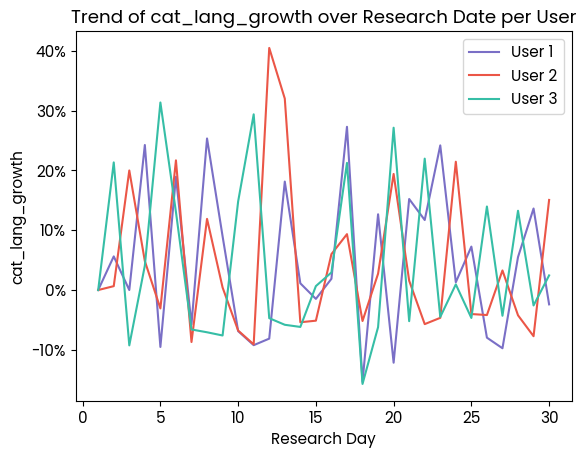

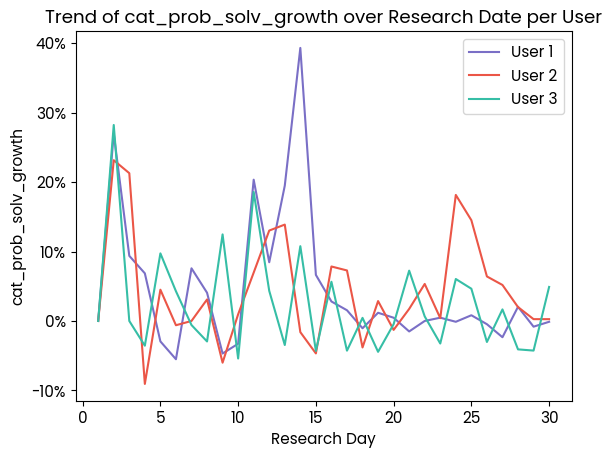

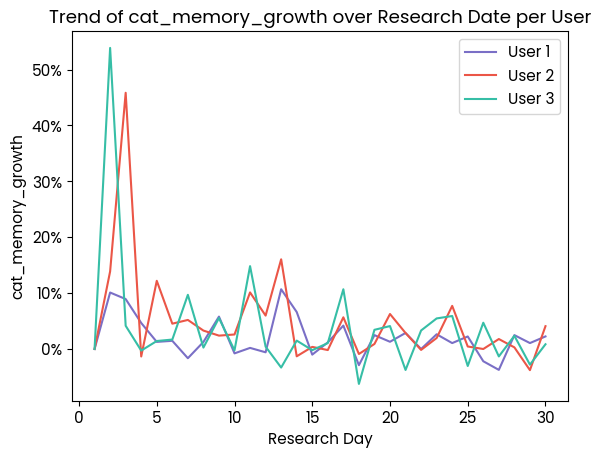

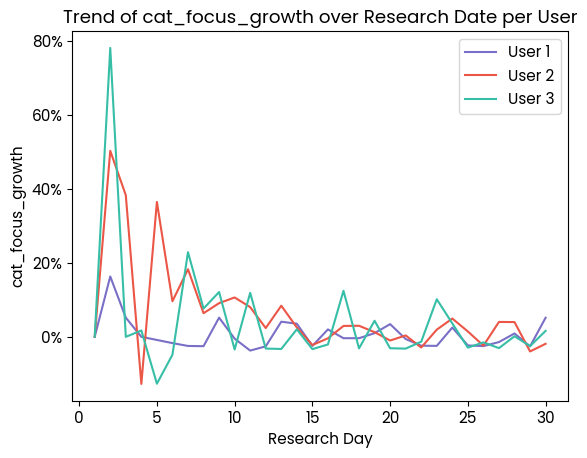

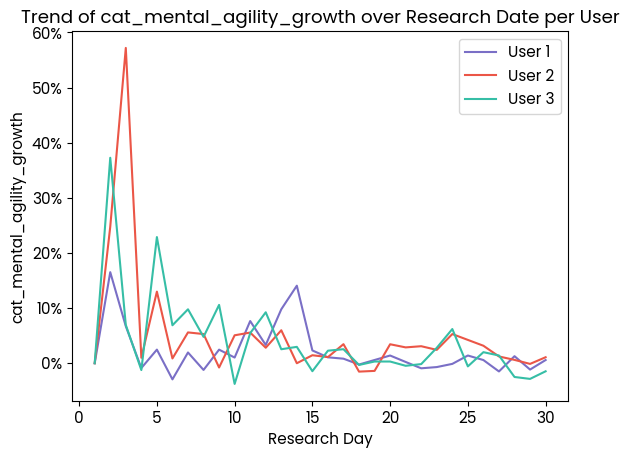

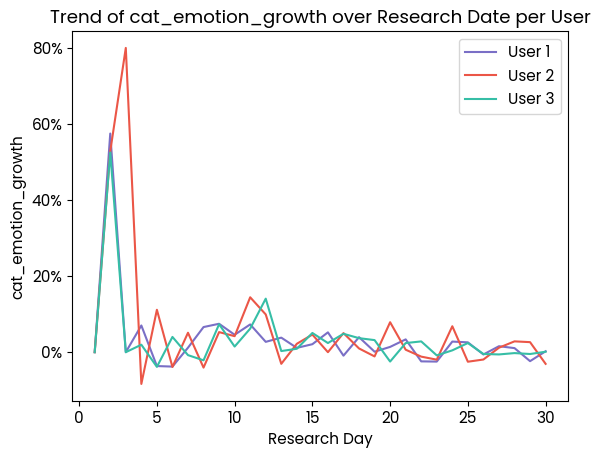

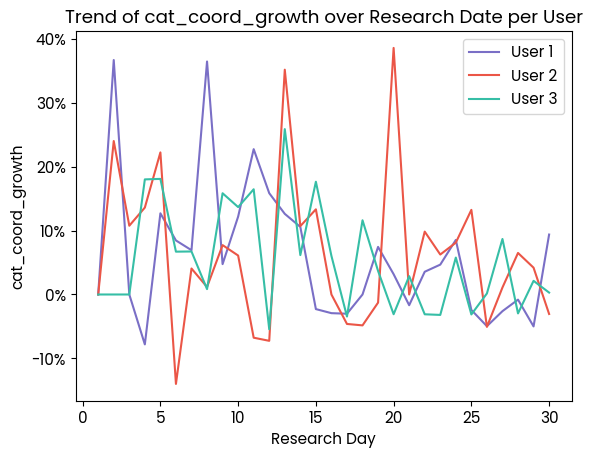

In [18]:
def create_growth_plots_per_user(df):
    """
    This function creates a separate line plot for each specified variable with the research date on the x-axis 
    and the variable on the y-axis. It creates a different line for each user.
    """
    
    # List of variables to plot
    variables = ['cat_lang_growth', 'cat_prob_solv_growth', 'cat_memory_growth', 'cat_focus_growth', 
                 'cat_mental_agility_growth', 'cat_emotion_growth', 'cat_coord_growth']

    # List of users and corresponding labels
    users = [('is_U1', 'User 1'), ('is_U2', 'User 2'), ('is_U3', 'User 3')]

    # Formatter for the y-axis labels
    formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))

    # Iterate over the variables
    for var in variables:
        # Create a new figure
        fig, ax = plt.subplots()

        # Set the formatter for the y-axis labels
        ax.yaxis.set_major_formatter(formatter)

        # Iterate over the users
        for user, label in users:
            # Create a mask for the current user
            mask = df[user] == 1

            # Create a line plot for the current variable and user
            ax.plot(df.loc[mask, 'Research_Date'], df.loc[mask, var], label=label)

        # Set the title, labels, and legend
        ax.set_title(f'Trend of {var} over Research Date per User')
        ax.set_xlabel('Research Day')
        ax.set_ylabel(var)
        ax.legend()

        # Save the plot as a .png file
        plt.savefig(f'/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_growth_{var}.png', format='png', dpi=300, bbox_inches='tight')

        # Display the plot
        plt.show()

# Calling the function with the DataFrame
create_growth_plots_per_user(df)

## Basic Analysis of Sleep Time

### Calculate mean sleep time for each user

In [19]:
# Calculate mean sleep_time_in_min for each user
mean_sleep_time_U1 = df[df['is_U1'] == 1]['sleep_time_in_min'].mean()
mean_sleep_time_U2 = df[df['is_U2'] == 1]['sleep_time_in_min'].mean()
mean_sleep_time_U3 = df[df['is_U3'] == 1]['sleep_time_in_min'].mean()

# Convert mean sleep time to hours and minutes
hours_U1, minutes_U1 = divmod(mean_sleep_time_U1, 60)
hours_U2, minutes_U2 = divmod(mean_sleep_time_U2, 60)
hours_U3, minutes_U3 = divmod(mean_sleep_time_U3, 60)

print("Mean sleep time for User 1:", mean_sleep_time_U1, "minutes, which are", f"{int(hours_U1)}:{int(minutes_U1):02d} hours")
print("Mean sleep time for User 2:", mean_sleep_time_U2, "minutes, which are", f"{int(hours_U2)}:{int(minutes_U2):02d} hours")
print("Mean sleep time for User 3:", mean_sleep_time_U3, "minutes, which are", f"{int(hours_U3)}:{int(minutes_U3):02d} hours")

Mean sleep time for User 1: 416.76666666666665 minutes, which are 6:56 hours
Mean sleep time for User 2: 442.4 minutes, which are 7:22 hours
Mean sleep time for User 3: 448.3333333333333 minutes, which are 7:28 hours


### Calculate mean sleep time for weekdays and weekends

In [20]:
# Define the weekdays and weekend
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# Calculate mean sleep time on weekdays
mean_sleep_time_U1_weekdays = df[(df['is_U1'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].mean()
mean_sleep_time_U2_weekdays = df[(df['is_U2'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].mean()
mean_sleep_time_U3_weekdays = df[(df['is_U3'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].mean()

# Calculate mean sleep time on weekend
mean_sleep_time_U1_weekend = df[(df['is_U1'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].mean()
mean_sleep_time_U2_weekend = df[(df['is_U2'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].mean()
mean_sleep_time_U3_weekend = df[(df['is_U3'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].mean()

# Convert minutes to HH:MM format
def convert_minutes_to_HH_MM(minutes):
    hours = int(minutes // 60)
    minutes = int(minutes % 60)
    return f"{hours:02d}:{minutes:02d}"

# Print the results
print("Mean sleep time for User 1 on weekdays:", convert_minutes_to_HH_MM(mean_sleep_time_U1_weekdays))
print("Mean sleep time for User 2 on weekdays:", convert_minutes_to_HH_MM(mean_sleep_time_U2_weekdays))
print("Mean sleep time for User 3 on weekdays:", convert_minutes_to_HH_MM(mean_sleep_time_U3_weekdays))

print("Mean sleep time for User 1 on weekend:", convert_minutes_to_HH_MM(mean_sleep_time_U1_weekend))
print("Mean sleep time for User 2 on weekend:", convert_minutes_to_HH_MM(mean_sleep_time_U2_weekend))
print("Mean sleep time for User 3 on weekend:", convert_minutes_to_HH_MM(mean_sleep_time_U3_weekend))

Mean sleep time for User 1 on weekdays: 06:57
Mean sleep time for User 2 on weekdays: 07:23
Mean sleep time for User 3 on weekdays: 07:24
Mean sleep time for User 1 on weekend: 06:54
Mean sleep time for User 2 on weekend: 07:18
Mean sleep time for User 3 on weekend: 07:39


<Figure size 600x800 with 0 Axes>

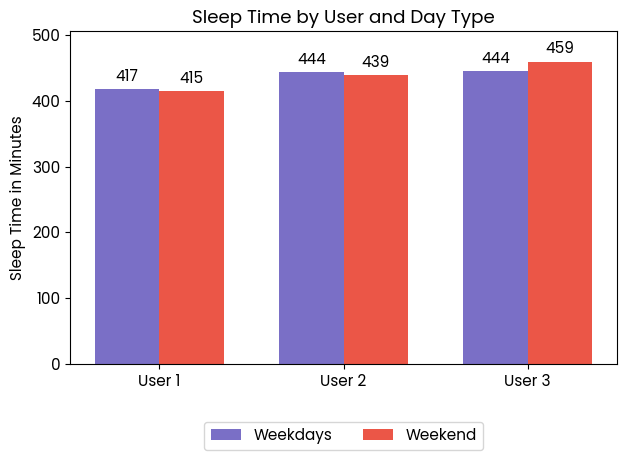

In [21]:
# Define the user labels
users = ['User 1', 'User 2', 'User 3']

# Get the mean sleep times for weekdays and weekends
weekdays_times = [mean_sleep_time_U1_weekdays, mean_sleep_time_U2_weekdays, mean_sleep_time_U3_weekdays]
weekend_times = [mean_sleep_time_U1_weekend, mean_sleep_time_U2_weekend, mean_sleep_time_U3_weekend]

x = np.arange(len(users))  # the label locations
width = 0.35  # the width of the bars

# Increase the height of the figure
plt.figure(figsize=(6,8))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weekdays_times, width, label='Weekdays')
rects2 = ax.bar(x + width/2, weekend_times, width, label='Weekend')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sleep Time in Minutes')
ax.set_title('Sleep Time by User and Day Type')
ax.set_xticks(x)
ax.set_xticklabels(users)

# Move the legend outside the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Function to auto label the bars with their height values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Add some space at the top of the plot
plt.subplots_adjust(top=0.9)

# Increase the y limit of the plot to make room for the labels
ax.set_ylim(0, max(weekdays_times + weekend_times) * 1.1) # adjust the 1.1 if you need more or less space

fig.tight_layout()

# Saving the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_sleep_time_user_day_type.png', format='png', dpi=300, transparent=True)

plt.show()

### Average Sleep Duration

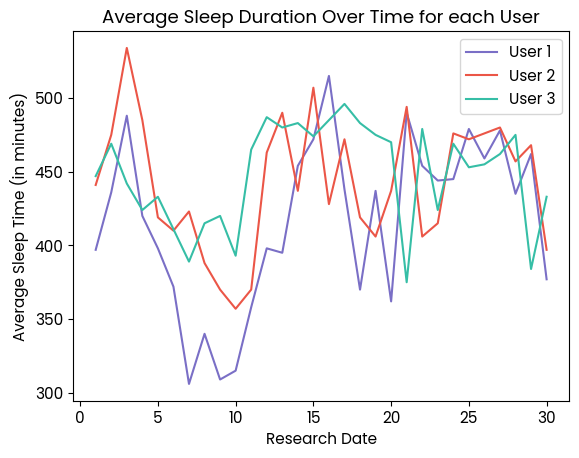

In [22]:
def plot_avg_sleep_duration(df):
    """
    This function creates a line plot of 'Research_Date' vs average 'sleep_time_in_min' 
    for each user in the DataFrame.
    """
    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # List of users
    users = ['is_U1', 'is_U2', 'is_U3']

    # Iterate over the users
    for user in users:
        # Create a mask for the current user
        mask = df[user] == 1

        # Create a line plot for the average sleep time and user
        ax.plot(df.loc[mask, 'Research_Date'], df.loc[mask, 'sleep_time_in_min'], label=f'User {user[-1]}')

    # Adding a legend
    ax.legend()

    # Adding labels for the x and y axes
    ax.set_xlabel('Research Date')
    ax.set_ylabel('Average Sleep Time (in minutes)')

    # Adding a title
    ax.set_title('Average Sleep Duration Over Time for each User')

    # Saving the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_avg_sleep_duration.png', format='png', dpi=300, transparent=True)

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_avg_sleep_duration(df)

### Standard Deviation for sleep time + for weekdays and weekends

In [23]:
# Compute the standard deviation for each user
std_sleep_time_U1 = df[df['is_U1'] == 1]['sleep_time_in_min'].std()
std_sleep_time_U2 = df[df['is_U2'] == 1]['sleep_time_in_min'].std()
std_sleep_time_U3 = df[df['is_U3'] == 1]['sleep_time_in_min'].std()

# Compute the standard deviation for each user on weekdays
std_sleep_time_U1_weekdays = df[(df['is_U1'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].std()
std_sleep_time_U2_weekdays = df[(df['is_U2'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].std()
std_sleep_time_U3_weekdays = df[(df['is_U3'] == 1) & (df['Day'].isin(weekdays))]['sleep_time_in_min'].std()

# Compute the standard deviation for each user on weekends
std_sleep_time_U1_weekend = df[(df['is_U1'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].std()
std_sleep_time_U2_weekend = df[(df['is_U2'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].std()
std_sleep_time_U3_weekend = df[(df['is_U3'] == 1) & (df['Day'].isin(weekend))]['sleep_time_in_min'].std()

# Print the results
print("Standard deviation of sleep time for User 1:", std_sleep_time_U1)
print("Standard deviation of sleep time for User 2:", std_sleep_time_U2)
print("Standard deviation of sleep time for User 3:", std_sleep_time_U3)

print("\nStandard deviation of sleep time for User 1 on weekdays:", std_sleep_time_U1_weekdays)
print("Standard deviation of sleep time for User 2 on weekdays:", std_sleep_time_U2_weekdays)
print("Standard deviation of sleep time for User 3 on weekdays:", std_sleep_time_U3_weekdays)

print("\nStandard deviation of sleep time for User 1 on weekend:", std_sleep_time_U1_weekend)
print("Standard deviation of sleep time for User 2 on weekend:", std_sleep_time_U2_weekend)
print("Standard deviation of sleep time for User 3 on weekend:", std_sleep_time_U3_weekend)

Standard deviation of sleep time for User 1: 57.054531285690935
Standard deviation of sleep time for User 2: 43.97224830151007
Standard deviation of sleep time for User 3: 34.489711942622215

Standard deviation of sleep time for User 1 on weekdays: 62.476454439311446
Standard deviation of sleep time for User 2 on weekdays: 45.840491373355164
Standard deviation of sleep time for User 3 on weekdays: 37.520009091831014

Standard deviation of sleep time for User 1 on weekend: 42.07624881433365
Standard deviation of sleep time for User 2 on weekend: 41.05658116724841
Standard deviation of sleep time for User 3 on weekend: 22.69007020073507


### Comparison of sleep phases

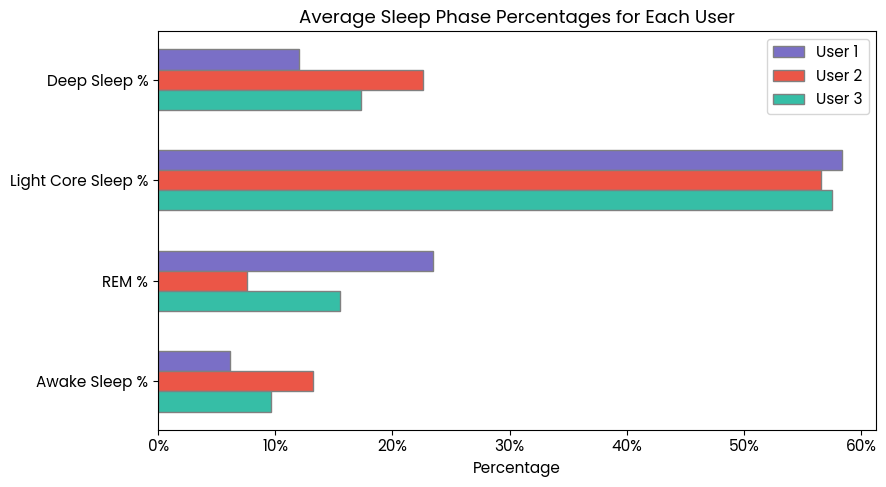

In [24]:
import matplotlib.ticker as mtick

# Calculate the average percentage for each sleep phase for each user
average_percentages_U1 = df[df['is_U1'] == 1][['awake_sleep_perc', 'REM_perc', 'light_core_sleep_perc', 'deep_sleep_perc']].mean() * 100
average_percentages_U2 = df[df['is_U2'] == 1][['awake_sleep_perc', 'REM_perc', 'light_core_sleep_perc', 'deep_sleep_perc']].mean() * 100
average_percentages_U3 = df[df['is_U3'] == 1][['awake_sleep_perc', 'REM_perc', 'light_core_sleep_perc', 'deep_sleep_perc']].mean() * 100

# Define the labels for the bar chart
labels = ['Awake Sleep %', 'REM %', 'Light Core Sleep %', 'Deep Sleep %']

# Define the width of the bars
bar_width = 0.2

# Define the positions of the bars
r1 = np.arange(len(average_percentages_U1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and the axes with a wider figsize
fig, ax = plt.subplots(figsize=(9, 5))

# Add the bars for each user
ax.barh(r3, average_percentages_U1, height=bar_width, edgecolor='grey', label='User 1')
ax.barh(r2, average_percentages_U2, height=bar_width, edgecolor='grey', label='User 2')
ax.barh(r1, average_percentages_U3, height=bar_width, edgecolor='grey', label='User 3')

# Add a '%' sign to the numbers on the x-axis
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add the labels
ax.set_xlabel('Percentage')
ax.set_title('Average Sleep Phase Percentages for Each User')
ax.set_yticks([r + bar_width for r in range(len(average_percentages_U1))], labels)

# Add the legend
ax.legend()

# Adjust the layout
plt.tight_layout()

# Saving the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_bars_sleep_phases_each_user.png', format='png', dpi=300, transparent=True)


# Show the plot
plt.show()

###Variance of sleep time for three users
* The function begins by creating a new figure and axes using the plt.subplots() function from matplotlib.
* It then creates three separate DataFrames from df, one for each user, by filtering df based on the 'is_U1', 'is_U2', and 'is_U3' columns.
* For each user, the function then uses the ax.boxplot() function to create a box plot of 'sleep_time_in_min' on the axes. 
* The function adds a legend to the plot using ax.legend(), labels for the x and y axes using ax.set_xlabel() and ax.set_ylabel(), and a title using ax.set_title(). 
* Finally, the function displays the plot using plt.show().



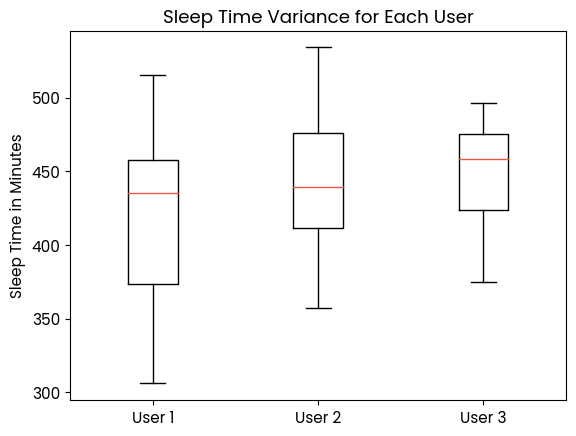

In [25]:
def plot_sleep_time(df):
    """
    This function creates a box plot of 'sleep_time_in_min' for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Create a list of sleep times for each user
    sleep_times = [df[df['is_U1'] == 1]['sleep_time_in_min'],
                   df[df['is_U2'] == 1]['sleep_time_in_min'],
                   df[df['is_U3'] == 1]['sleep_time_in_min']]

    # Create a box plot of sleep times
    ax.boxplot(sleep_times)

    # Set the x-tick labels
    ax.set_xticklabels(['User 1', 'User 2', 'User 3'])

    # Set the y-label
    ax.set_ylabel('Sleep Time in Minutes')

    # Set the title
    ax.set_title('Sleep Time Variance for Each User')

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_box_sleep_time.png', 
                format='png', 
                dpi=300,
                transparent=True)

    # Show the plot
    plt.show()

# Calling the function with the DataFrame
plot_sleep_time(df)

### Variance of REM Sleep

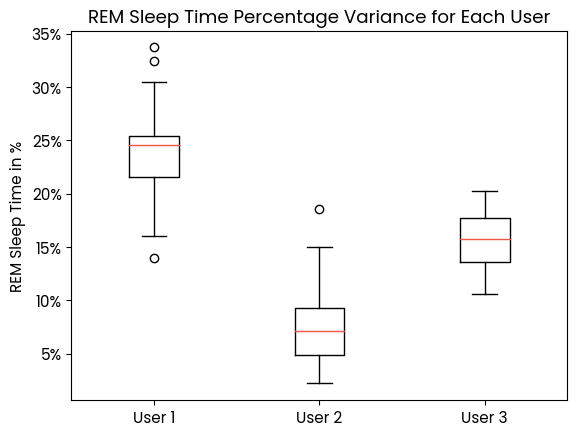

In [26]:
def plot_REM_sleep_perc(df):
    """
    This function creates a box plot of 'REM_perc' for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Create a list of sleep times for each user
    sleep_times = [df[df['is_U1'] == 1]['REM_perc'],
                   df[df['is_U2'] == 1]['REM_perc'],
                   df[df['is_U3'] == 1]['REM_perc']]

    # Formatter for the y-axis labels
    formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
    
    # Create a box plot of sleep times
    ax.boxplot(sleep_times)

    # Set the x-tick labels
    ax.set_xticklabels(['User 1', 'User 2', 'User 3'])

    # Set the y-label
    ax.set_ylabel('REM Sleep Time in %')

    # Set the title
    ax.set_title('REM Sleep Time Percentage Variance for Each User')

    # Set the formatter for the y-axis labels
    ax.yaxis.set_major_formatter(formatter)

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_box_REM_perc.png', 
                format='png', 
                dpi=300,
                transparent=True)

    # Show the plot
    plt.show()

# Calling the function with the DataFrame
plot_REM_sleep_perc(df)

### Variance of Deep Sleep

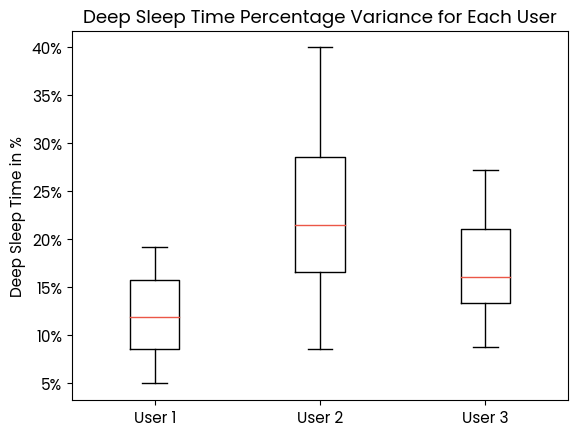

In [27]:
def plot_deep_sleep_perc(df):
    """
    This function creates a box plot of 'deep_sleep_perc' for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Create a list of sleep times for each user
    sleep_times = [df[df['is_U1'] == 1]['deep_sleep_perc'],
                   df[df['is_U2'] == 1]['deep_sleep_perc'],
                   df[df['is_U3'] == 1]['deep_sleep_perc']]

    # Create a box plot of sleep times
    ax.boxplot(sleep_times)

    # Formatter for the y-axis labels
    formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))

    # Set the x-tick labels
    ax.set_xticklabels(['User 1', 'User 2', 'User 3'])

    # Set the y-label
    ax.set_ylabel('Deep Sleep Time in %')

    # Set the title
    ax.set_title('Deep Sleep Time Percentage Variance for Each User')

    # Set the formatter for the y-axis labels
    ax.yaxis.set_major_formatter(formatter)

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_box_deep_sleep_perc.png', 
                format='png', 
                dpi=300,
                transparent=True)

    # Show the plot
    plt.show()

# Calling the function with the DataFrame
plot_deep_sleep_perc(df)

### Variance of Light Core Sleep

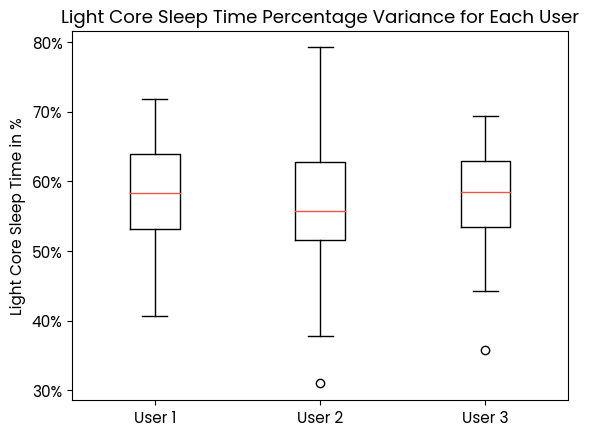

In [28]:
def plot_light_core_sleep_perc(df):
    """
    This function creates a box plot of 'light_core_sleep_perc' for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Create a list of sleep times for each user
    sleep_times = [df[df['is_U1'] == 1]['light_core_sleep_perc'],
                   df[df['is_U2'] == 1]['light_core_sleep_perc'],
                   df[df['is_U3'] == 1]['light_core_sleep_perc']]

    # Create a box plot of sleep times
    ax.boxplot(sleep_times)

    # Formatter for the y-axis labels
    formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))

    # Set the x-tick labels
    ax.set_xticklabels(['User 1', 'User 2', 'User 3'])

    # Set the y-label
    ax.set_ylabel('Light Core Sleep Time in %')

    # Set the title
    ax.set_title('Light Core Sleep Time Percentage Variance for Each User')

    # Set the formatter for the y-axis labels
    ax.yaxis.set_major_formatter(formatter)

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_box_light_core_sleep_perc.png', 
                format='png', 
                dpi=300,
                transparent=True)

    # Show the plot
    plt.show()

# Calling the function with the DataFrame
plot_light_core_sleep_perc(df)

### Sleep Time over Research Date for each user

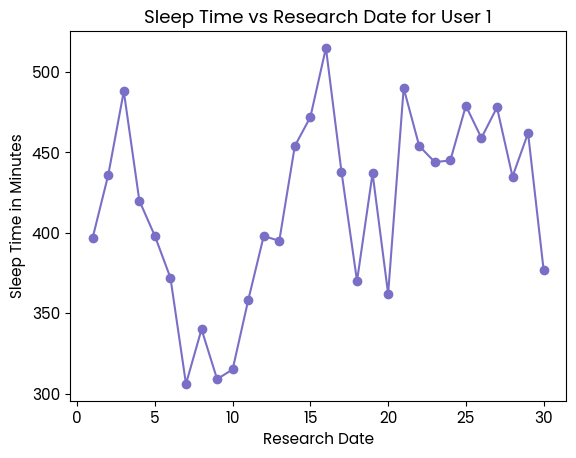

In [29]:
# Filter data to include only user 1
df_user1 = df[df['is_U1'] == 1]

# Define variables
x = df_user1['Research_Date']
y = df_user1['sleep_time_in_min']

# Create a scatter plot
plt.scatter(x, y)

# Add line connecting points
plt.plot(x, y)

# Label axes
plt.xlabel('Research Date')
plt.ylabel('Sleep Time in Minutes')

# Add a title
plt.title('Sleep Time vs Research Date for User 1')

# Saving the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_sleep_duration_U1.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

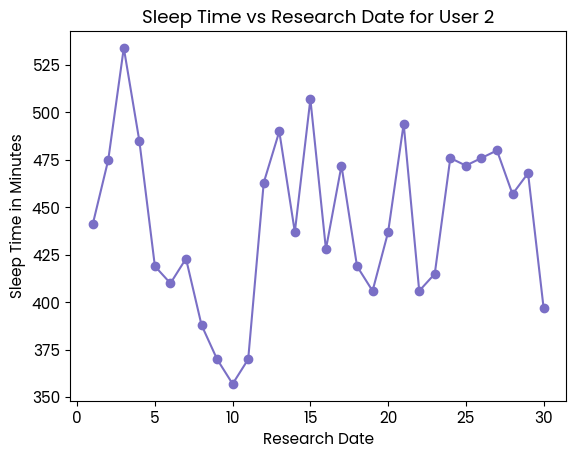

In [30]:
# Filter data to include only user 2
df_user2 = df[df['is_U2'] == 1]

# Define variables
x = df_user2['Research_Date']
y = df_user2['sleep_time_in_min']

# Create a scatter plot
plt.scatter(x, y)

# Add line connecting points
plt.plot(x, y)

# Label axes
plt.xlabel('Research Date')
plt.ylabel('Sleep Time in Minutes')

# Add a title
plt.title('Sleep Time vs Research Date for User 2')

# Saving the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_sleep_duration_U2.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

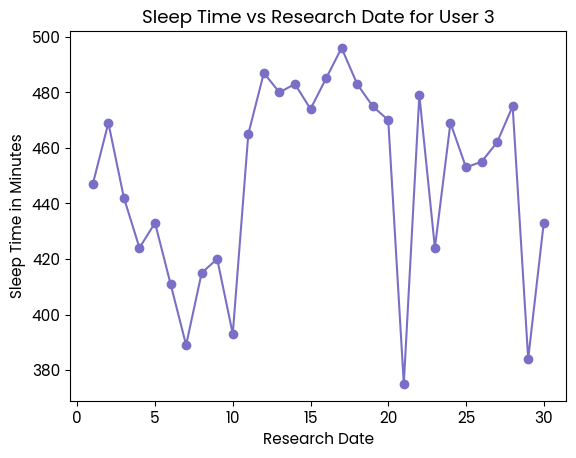

In [31]:
# Filter data to include only user 3
df_user3 = df[df['is_U3'] == 1]

# Define variables
x = df_user3['Research_Date']
y = df_user3['sleep_time_in_min']

# Create a scatter plot
plt.scatter(x, y)

# Add line connecting points
plt.plot(x, y)

# Label axes
plt.xlabel('Research Date')
plt.ylabel('Sleep Time in Minutes')

# Add a title
plt.title('Sleep Time vs Research Date for User 3')

# Saving the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_sleep_duration_U3.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

## Correlation Matrix
* The function starts by creating a subset of the DataFrame containing only the specified columns. It then calculates the correlation matrix using the corr() method of the DataFrame.
* This correlation matrix is passed to seaborn's heatmap function to create a heatmap plot, which is a graphical representation of the correlation matrix where different colors represent different correlation coefficients.
* Finally, the function displays the plot using plt.show().

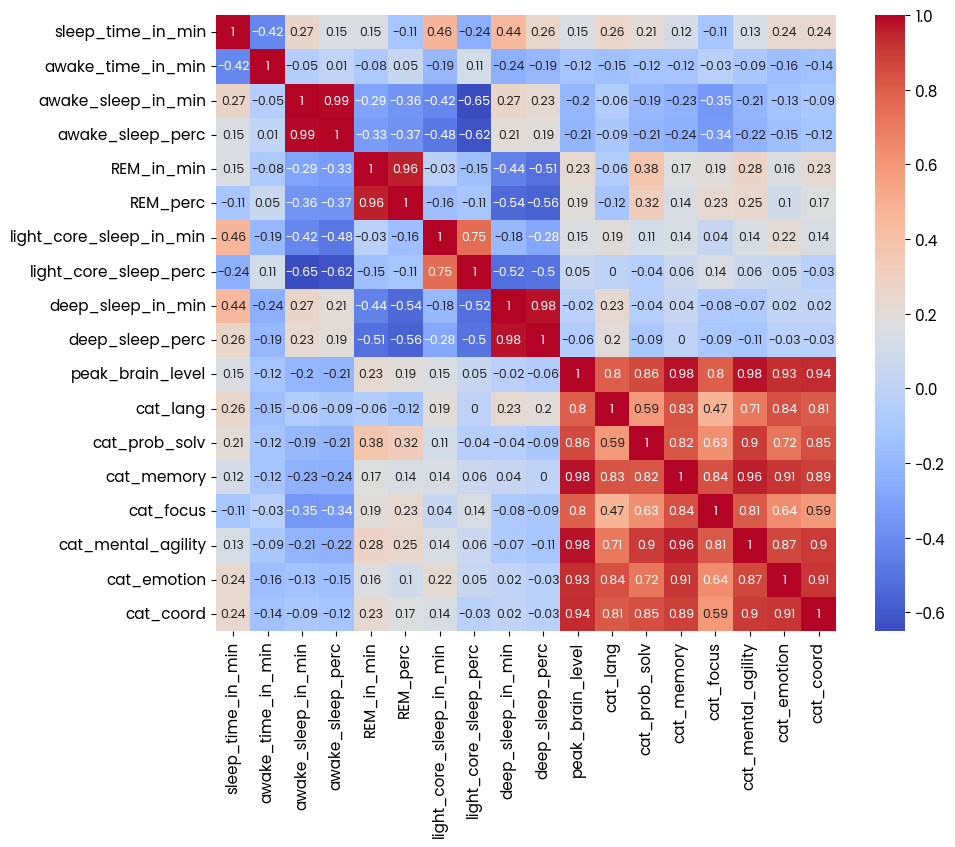

In [32]:
# Importing necessary library
import seaborn as sns

def plot_corr_matrix(df):
    """
    This function creates a correlation matrix for a set of variables in the DataFrame.
    """
    
    # Selecting the required columns
    selected_columns = ['sleep_time_in_min', 'awake_time_in_min', 'awake_sleep_in_min', 'awake_sleep_perc', 'REM_in_min', 'REM_perc',
                        'light_core_sleep_in_min', 'light_core_sleep_perc', 'deep_sleep_in_min', 'deep_sleep_perc', 'peak_brain_level', 'cat_lang', 
                        'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Creating a larger plot
    plt.figure(figsize=(10, 8))

    # Calculating the correlation matrix and rounding to 2 decimal places
    corr_matrix_rounded = corr_matrix.round(2)

    # Creating a heatmap of the correlation matrix with larger annotation text
    sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', annot_kws={"size": 9})

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/heatmap_all_variables.png', 
                format='png', 
                dpi=300,
                transparent=True,
                bbox_inches='tight') # Make sure all labels fit in the saved figure


    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_corr_matrix(df)

Now, as next step, we want to list the highest correlations:
* The function starts by creating a subset of the DataFrame containing only the specified columns. 
* It then calculates the correlation matrix using the corr() method of the DataFrame.
* This correlation matrix is then "melted" into a long format and sorted by the correlation values.
* The function then returns the top and bottom five correlations.

In [34]:
def find_extreme_correlations(df):
    """
    This function finds the five pairs of variables with the highest and lowest correlations in the DataFrame.
    """

    # Selecting the required columns
    selected_columns = ['sleep_time_in_min', 'awake_time_in_min', 'awake_sleep_in_min', 'awake_sleep_perc', 'REM_in_min', 'REM_perc',
                        'light_core_sleep_in_min', 'light_core_sleep_perc', 'deep_sleep_in_min', 'deep_sleep_perc', 'peak_brain_level', 'cat_lang', 
                        'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Melting the correlation matrix into a long format
    corr_melted = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool)).stack().reset_index()

    # Renaming the columns
    corr_melted.columns = ['Variable 1', 'Variable 2', 'Correlation']

    # Sorting by correlation
    corr_sorted = corr_melted.sort_values(by='Correlation', key=abs, ascending=False)

    # Finding the five pairs of variables with the highest correlations
    highest_corr = corr_sorted.head(5)

    # Finding the five pairs of variables with the lowest correlations
    lowest_corr = corr_sorted.tail(5)

    return highest_corr, lowest_corr

# Calling the function with the DataFrame
highest_corr, lowest_corr = find_extreme_correlations(df)

# Print the results
print("Highest correlations:")
print(highest_corr)

print("\nLowest correlations:")
print(lowest_corr)

Highest correlations:
             Variable 1          Variable 2  Correlation
5      awake_sleep_perc  awake_sleep_in_min     0.987070
115  cat_mental_agility    peak_brain_level     0.983816
88           cat_memory    peak_brain_level     0.983619
44      deep_sleep_perc   deep_sleep_in_min     0.976201
14             REM_perc          REM_in_min     0.960574

Lowest correlations:
           Variable 1             Variable 2  Correlation
128       cat_emotion      deep_sleep_in_min     0.022613
53   peak_brain_level      deep_sleep_in_min    -0.015576
4    awake_sleep_perc      awake_time_in_min     0.007750
87         cat_memory        deep_sleep_perc     0.004606
62           cat_lang  light_core_sleep_perc     0.004427


### Correlation Matrix just for the Peak Brain Game Categories

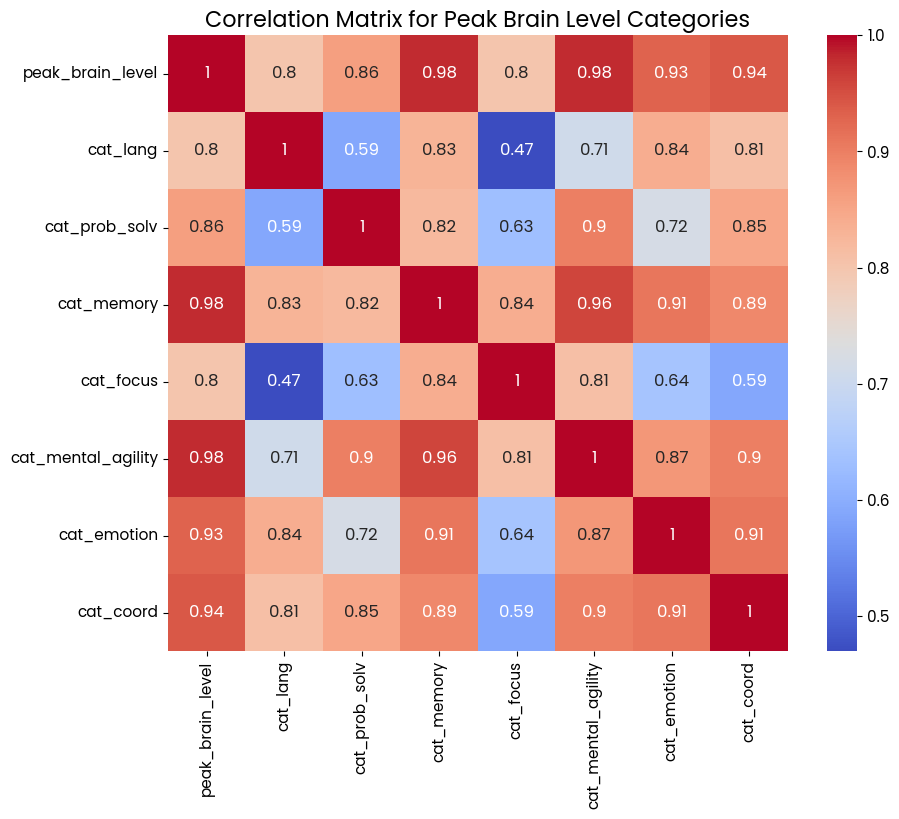

In [35]:
def plot_corr_matrix(df):
    """
    This function creates a correlation matrix for a set of variables in the DataFrame.
    """
    
    # Selecting the required columns
    selected_columns = ['peak_brain_level', 'cat_lang', 'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Creating a larger plot
    plt.figure(figsize=(10, 8))

    # Calculating the correlation matrix and rounding to 2 decimal places
    corr_matrix_rounded = corr_matrix.round(2)

    # Creating a heatmap of the correlation matrix with larger annotation text
    sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', annot_kws={"size": 12})

    # Add the title
    plt.title('Correlation Matrix for Peak Brain Level Categories', fontsize=16)

    # Save the plot as a .png file with a transparent background
    plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/heatmap_game_categories.png', 
                format='png', 
                dpi=300,
                transparent=True,
                bbox_inches='tight') # Make sure all labels fit in the saved figure


    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_corr_matrix(df)

#1. Hypothesis 1 analysis

**Continuous training will have a significant impact on performance in several areas of cognitive ability**



## 1.1. OLR - Optimal Linear Regression Hypothesis 1


### Research Date vs. Peak Brain Level

In [37]:
# Import the statsmodels library for statistical modeling
import statsmodels.api as sm

# Set 'Research_Date' as the independent variable
X = df['Research_Date']

# Set 'peak_brain_level' as the dependent variable
y = df['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     364.0
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.10e-33
Time:                        07:33:28   Log-Likelihood:                -504.37
No. Observations:                  90   AIC:                             1013.
Df Residuals:                      88   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           342.7126     14.366     23.856

**Interpretation for Research Date vs. Peak Brain Level**
* R-squared: The value is 0.805, which means that approximately 80.5% of the variability in peak_brain_level is explained by the variable Research_Date. This indicates a strong relationship.
* Adj. R-squared: The value is 0.803. This is very close to the R-squared value, indicating that the model is not overly complex. In other words, the model is making good use of the given predictor (Research_Date).
* P>|t|: The p-value for the coefficient of Research_Date is 0.000, which is less than the commonly used threshold of 0.05. This indicates that Research_Date is a statistically significant predictor of peak_brain_level.
* coef: The coefficient for Research_Date is 15.4379. This means that for each unit increase in Research_Date, we can expect an average increase of 15.4379 in peak_brain_level.
* Overall, the model appears to be statistically significant and effective at predicting peak_brain_level based on Research_Date.

### Scatter Plot with Regression Line for Research Date vs. Peak Brain Level

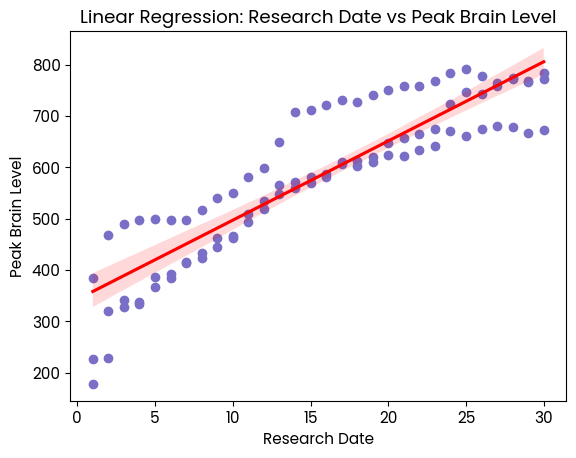

In [38]:
import seaborn as sns

# Define the predictor variable (Research Date)
X = df['Research_Date']

# Define the dependent variable (peak brain level)
Y = df['peak_brain_level']

# Plot the actual data (Research Date vs. peak brain level) as a scatter plot
plt.scatter(X, Y)

# Use seaborn's regplot function to plot the regression line with confidence interval
# The scatter=False argument prevents regplot from plotting the scatterplot again
sns.regplot(x=X, y=Y, scatter=False, line_kws={'color': 'red'}, ci=95)

# Label the x-axis
plt.xlabel('Research Date')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a title
plt.title('Linear Regression: Research Date vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

## Signs of a nonlinear regression
The first scatter plot gave us the impression that it was a rather nonlinear regression with the curve of the cube root. We will take a closer look at this in the next steps.

In [40]:
from scipy.optimize import curve_fit

# Here, we're defining the form of the function you want to fit to our data
# In this case, it's a cubic root function (np.cbrt(x)) with parameters a and b (a * np.cbrt(x) + b)
def func(x, a, b):
  return a * np.cbrt(x) + b

# We're setting up our data
# x_data is our independent variable (Research Date)
# y_data is our dependent variable (peak brain level)
x_data = df['Research_Date']
y_data = df['peak_brain_level']

# use curve_fit to find the best fit parameters
# curve_fit is a function from the SciPy library that fits a function (func) to data (x_data and y_data)
popt, pcov = curve_fit(func, x_data, y_data)

# It returns two outputs: popt and pcov
# popt is an array of the optimal values of a and b that minimize the difference between the function func(x, a, b) and the y_data
# pcov is the estimated covariance of popt, which provides an estimate of the uncertainties in popt.

# popt contains the optimal values for a and b
print("a = ", popt[0])
print("b = ", popt[1])

# We're evaluating the fitted function at a specific x-value (x = 3 in this case) using the optimal parameters a and b found by curve_fit
y = func(3, *popt)
print("y = ", y)

a =  242.1551757130914
b =  7.350579748560975
y =  356.598777868482


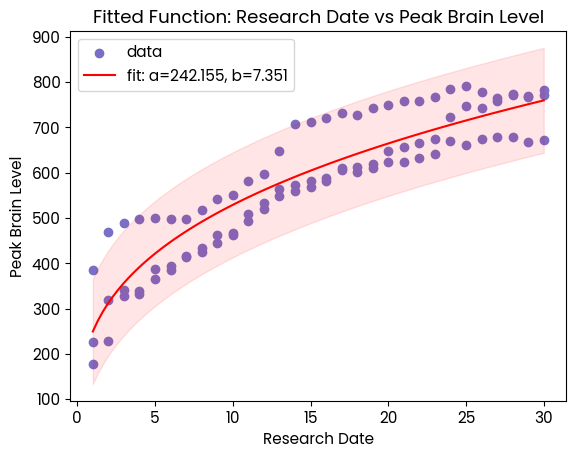

In [41]:
# Generating a range of x values to plot the fitted function
x_fit = np.linspace(min(x_data), max(x_data), len(x_data))

# Calculating the corresponding y values for the generated x values
y_fit = func(x_fit, *popt)

# Calculate the residuals
residuals = y_data - func(x_data, *popt)

# Estimate the standard deviation of the y-values
y_std_dev = np.sqrt(np.sum(residuals**2) / len(x_data))

# Calculate the confidence intervals (here, a 95% confidence interval)
ci = y_std_dev * 1.95

# Add/subtract the confidence interval from the fitted y-values
y_fit_upper = y_fit + ci
y_fit_lower = y_fit - ci

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Plot the original data as a scatter plot
ax.scatter(x_data, y_data, label='data')

# Plot the fitted function
ax.plot(x_fit, y_fit, 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# Plot the confidence intervals
ax.fill_between(x_fit, y_fit_lower, y_fit_upper, color='r', alpha=0.1)

# Label the x-axis
plt.xlabel('Research Date')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a legend
ax.legend()

# Add a title
plt.title('Fitted Function: Research Date vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_fitted_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Show the plot
plt.show()

### OLS Model with fitted values for Research Date vs. Peak Brain Level

In [42]:
# Use the optimal parameters to compute the fitted y-values for the data.
y_fitted = func(x_data, *popt)

# The statsmodels library requires the independent variable to be a two-dimensional array, 
# so we add a column of ones to our x_data array using the add_constant function. 
# This will also include an intercept term in the OLS model.
X_data = sm.add_constant(x_data)

# Fit an ordinary least squares (OLS) regression model to the x_data and the fitted y-values.
model = sm.OLS(y_fitted, X_data).fit()

# Print the summary of the OLS regression model, which includes statistical measures such as R-squared, the coefficient estimates, and standard errors.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Research_Date   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1382.
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.37e-55
Time:                        07:36:46   Log-Likelihood:                -443.48
No. Observations:                  90   AIC:                             891.0
Df Residuals:                      88   BIC:                             896.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           344.9493      7.303     47.232

**Interpretation for OLS model with fitted values**
* R-squared: The R-squared value represents the proportion of variance in the dependent variable that can be predicted from the independent variable(s). An R-squared value of 0.940 suggests that 94% of the variation in the dependent variable (Research_Date) can be explained by the independent variable, which is an improvement from the previous R-squared value of 0.805 in the original OLS model.
* Adjusted R-squared: This value adjusts R-squared for the degrees of freedom in the model. In this case, the adjusted R-squared is 0.939, which is slightly less than R-squared, but still indicates that the model explains a significant proportion of the variation in the dependent variable.
* coef (Coefficients): The coefficient for Research_Date is 15.2936. This suggests that for every unit increase in Research_Date, we expect the dependent variable (Research_Date) to increase by approximately 15.2936 units, holding all else constant. The constant coefficient is 344.9493, which represents the expected value of the dependent variable when Research_Date is zero.
* P>|t| (p-value): The p-value for Research_Date is 0.000, which suggests that Research_Date is a statistically significant predictor of the dependent variable at the 0.05 level (and even at much lower levels given that the p-value is so small). This means there is strong evidence to reject the null hypothesis that the coefficient for Research_Date is zero.

**Comparison to previous OLS model**
* In comparison to the previous OLS model, the new model with fitted values has a higher R-squared and adjusted R-squared, indicating a better fit to the data.
* The coefficients are also slightly different, which may be due to the different functional form (cubic root vs. linear) and the use of fitted values
* The p-values, however, suggest that Research_Date is a statistically significant predictor in both models.

### Goodness of fit for cubic root model
For that, we calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).
* The Root Mean Squared Error (RMSE) is a measure of how spread out the residuals are. In other words, it tells us how concentrated the data is around the line of best fit. 
* RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
* The Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, without considering their direction. 
* It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Our original y values are in the y_data variable
# Our fitted y values are given by the cubic root function evaluated at x_data with the optimal parameters
y_fit = func(x_data, *popt)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_data, y_fit))
print('Root Mean Squared Error:', rmse)

# Calculate MAE
mae = mean_absolute_error(y_data, y_fit)
print('Mean Absolute Error:', mae)

Root Mean Squared Error: 59.443544487154035
Mean Absolute Error: 50.95448122033236


**Interpretation for RMSE and MAE**
* Root Mean Squared Error (RMSE): In this case, the RMSE is 59.44. This means that, on average, the model's predictions are approximately 59.44 units away from the actual values.
* Mean Absolute Error (MAE): The MAE of 50.95 means that, on average, the model's predictions deviate from the actual values by about 50.95 units.

## Find fitted values for user 1

In [44]:
from scipy.optimize import curve_fit

# Filter data to include only user 1
df_user1 = df[df['is_U1'] == 1]

# Define the form of the function you want to fit to our data
# In this case, it's a fifth root function (x ** (1/5)) with parameters a and b (a * (x ** (1/5)) + b)
def func(x, a, b):
  return a * (x ** (1/5)) + b

# Set up our data
# x_data_u1 is our independent variable (Research Date) for User 1
# y_data_u1 is our dependent variable (peak brain level) for User 1
x_data_u1 = df_user1['Research_Date']
y_data_u1 = df_user1['peak_brain_level']

# Use curve_fit to find the best fit parameters
popt_u1, pcov_u1 = curve_fit(func, x_data_u1, y_data_u1)

# popt_u1 contains the optimal values for a and b for User 1
print("a = ", popt_u1[0])
print("b = ", popt_u1[1])

# Evaluate the fitted function at a specific x-value (x = 3 in this case) using the optimal parameters a and b found by curve_fit for User 1
y_u1 = func(3, *popt_u1)
print("y = ", y_u1)

a =  470.4241127725842
b =  -130.89891514312689
y =  455.1229568788605


### Plot fitted function for User 1

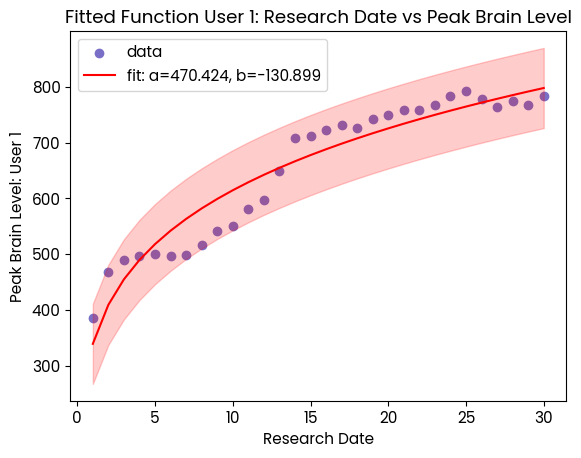

In [45]:
# Generating a range of x values to plot the fitted function
x_fit_u1 = np.linspace(min(x_data_u1), max(x_data_u1), len(x_data_u1))

# Calculating the corresponding y values for the generated x values
y_fit_u1 = func(x_fit_u1, *popt_u1)

# Calculate the residuals
residuals_u1 = y_data_u1 - func(x_data_u1, *popt_u1)

# Estimate the standard deviation of the y-values
y_std_dev_u1 = np.sqrt(np.sum(residuals_u1**2) / len(x_data_u1))

# Calculate the confidence intervals (here, a 95% confidence interval)
ci_u1 = y_std_dev_u1 * 1.96

# Add/subtract the confidence interval from the fitted y-values
y_fit_upper_u1 = y_fit_u1 + ci_u1
y_fit_lower_u1 = y_fit_u1 - ci_u1

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Plot the original data as a scatter plot
ax.scatter(x_data_u1, y_data_u1, label='data')

# Plot the fitted function
ax.plot(x_fit_u1, y_fit_u1, 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt_u1))

# Plot the confidence intervals
ax.fill_between(x_fit_u1, y_fit_lower_u1, y_fit_upper_u1, color='r', alpha=0.2)

# Label the x-axis
plt.xlabel('Research Date')

# Label the y-axis
plt.ylabel('Peak Brain Level: User 1')

# Add a legend
ax.legend()

# Add a title
plt.title('Fitted Function User 1: Research Date vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_fitted_U1_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Show the plot
plt.show()

### OLS Model for fitted values for user 1

In [46]:
# Use the optimal parameters to compute the fitted y-values for the data.
y_fitted_u1 = func(x_data_u1, *popt_u1)

# The statsmodels library requires the independent variable to be a two-dimensional array, 
# so we add a column of ones to our x_data_u1 array using the add_constant function. 
# This will also include an intercept term in the OLS model.
X_data_u1 = sm.add_constant(x_data_u1)

# Fit an ordinary least squares (OLS) regression model to the x_data_u1 and the fitted y-values.
model_u1 = sm.OLS(y_fitted_u1, X_data_u1).fit()

# Print the summary of the OLS regression model, which includes statistical measures such as R-squared, the coefficient estimates, and standard errors.
print(model_u1.summary())

                            OLS Regression Results                            
Dep. Variable:          Research_Date   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     279.3
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.24e-16
Time:                        07:37:08   Log-Likelihood:                -149.94
No. Observations:                  30   AIC:                             303.9
Df Residuals:                      28   BIC:                             306.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           450.3714     13.892     32.418

### Calculate the difference between the expected values of the line (fitted values) and the actual values for user 1

In [47]:
# Calculate fitted values (expected y-values) for all x_data_u1
y_fitted_u1 = func(x_data_u1, *popt_u1)

# Calculate the difference between the fitted values and the actual y_data_u1
difference_U1 = y_data_u1 - y_fitted_u1

# Print the difference
print(difference_U1)

1     45.474802
2     59.523511
3     34.877043
4      7.170577
5    -18.159187
6    -45.263445
7    -65.340365
8    -65.130706
9    -58.126662
10   -64.673059
11   -48.021499
12   -44.361581
13    -5.839968
14    41.427396
15    34.347156
16    33.842962
17    32.851521
18    19.319735
19    25.202601
20    24.461615
21    25.063564
22    16.979585
23    18.184425
24    26.655855
25    27.374200
26     7.321953
27   -14.516533
28   -11.155307
29   -24.607031
30   -14.883160
dtype: float64


### Calculate mean difference between the expected values of the line (fitted function) and the actual values for U1

In [48]:
mean_U1 = difference_U1.mean()
print(mean_U1)

-9.473903143468003e-14


### Calculate the correlation between the difference and the sleep time in minutes for user 1

In [49]:
# Filter df to include only user 1
df_user1 = df[df['is_U1'] == 1]

# Calculate the correlation
correlation = df_user1['sleep_time_in_min'].corr(difference_U1)

# Print the correlation
print(correlation)

0.7106877101197439


### Sleep Time vs Difference for user 1

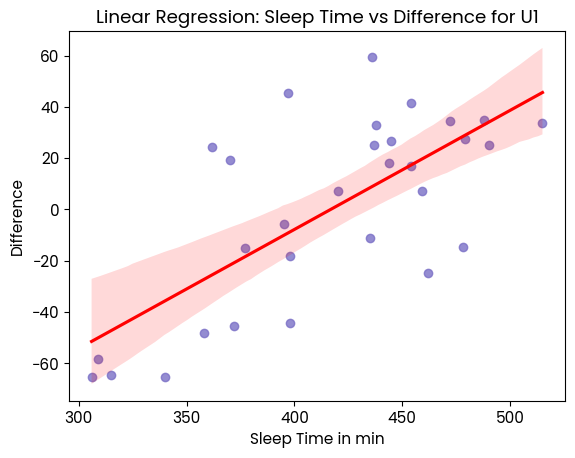

In [50]:
import seaborn as sns

# Filter df to include only user 1
df_user1 = df[df['is_U1'] == 1]

# Define the predictor variable (Sleep Time in min)
X = df_user1['sleep_time_in_min']

# Define the dependent variable (difference)
Y = difference_U1

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Label the x-axis
plt.xlabel('Sleep Time in min')

# Label the y-axis
plt.ylabel('Difference')

# Add a title
plt.title('Linear Regression: Sleep Time vs Difference for U1')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_U1_sleep_time_and_difference.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### OLS Model for Sleep Time vs Difference for User 1

In [51]:
# Filter df to include only user 1
df_user1 = df[df['is_U1'] == 1]

# Define the predictor variable (Research Date)
X = df_user1['sleep_time_in_min']

# Set 'peak_brain_level' as the dependent variable
y = difference_U1

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     28.57
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.08e-05
Time:                        07:37:34   Log-Likelihood:                -140.06
No. Observations:                  30   AIC:                             284.1
Df Residuals:                      28   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -193.4961     36.52

## Find fitted values for user 2

In [52]:
from scipy.optimize import curve_fit

# Filter data to include only user 2
df_user2 = df[df['is_U2'] == 1]

# Define the form of the function you want to fit to our data
# In this case, it's a cube root function with parameters a and b (a * (x ** (1/3)) + b)
def func(x, a, b):
  return a * np.cbrt(x) + b

# Set up our data
# x_data_u2 is our independent variable (Research Date) for user 2
# y_data_u2 is our dependent variable (peak brain level) for user 2
x_data_u2 = df_user2['Research_Date']
y_data_u2 = df_user2['peak_brain_level']

# Use curve_fit to find the best fit parameters
popt_u2, pcov_u2 = curve_fit(func, x_data_u2, y_data_u2)

# popt_u2 contains the optimal values for a and b for user 2
print("a = ", popt_u2[0])
print("b = ", popt_u2[1])

# Evaluate the fitted function at a specific x-value (x = 3 in this case) using the optimal parameters a and b found by curve_fit
y = func(3, *popt_u2)
print("y = ", y)

a =  286.109372421229
b =  -122.42215217668029
y =  290.2189672587595


### Plot fitted function for user 2

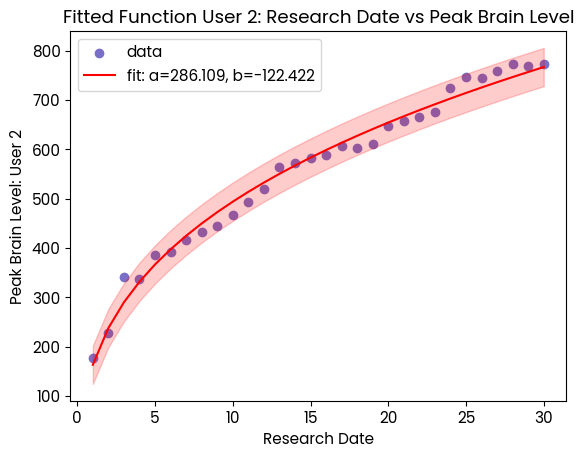

In [53]:
# Generating a range of x values to plot the fitted function
x_fit_u2 = np.linspace(min(x_data_u2), max(x_data_u2), len(x_data_u2))

# Calculating the corresponding y values for the generated x values
y_fit_u2 = func(x_fit_u2, *popt_u2)

# Calculate the residuals
residuals_u2 = y_data_u2 - func(x_data_u2, *popt_u2)

# Estimate the standard deviation of the y-values
y_std_dev_u2 = np.sqrt(np.sum(residuals_u2**2) / len(x_data_u2))

# Calculate the confidence intervals (here, a 95% confidence interval)
ci_u2 = y_std_dev_u2 * 1.96

# Add/subtract the confidence interval from the fitted y-values
y_fit_upper_u2 = y_fit_u2 + ci_u2
y_fit_lower_u2 = y_fit_u2 - ci_u2

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Plot the original data as a scatter plot
ax.scatter(x_data_u2, y_data_u2, label='data')

# Plot the fitted function
ax.plot(x_fit_u2, y_fit_u2, 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt_u2))

# Plot the confidence intervals
ax.fill_between(x_fit_u2, y_fit_lower_u2, y_fit_upper_u2, color='r', alpha=0.2)

# Label the x-axis
plt.xlabel('Research Date')

# Label the y-axis
plt.ylabel('Peak Brain Level: User 2')

# Add a legend
ax.legend()

# Add a title
plt.title('Fitted Function User 2: Research Date vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_fitted_U2_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Show the plot
plt.show()

### OLS Model for fitted values for user 2

In [54]:
# Use the optimal parameters to compute the fitted y-values for the data.
y_fitted_u2 = func(x_data_u2, *popt_u2)

# The statsmodels library requires the independent variable to be a two-dimensional array, 
# so we add a column of ones to our x_data array using the add_constant function. 
# This will also include an intercept term in the OLS model.
X_data_u2 = sm.add_constant(x_data_u2)

# Fit an ordinary least squares (OLS) regression model to the x_data and the fitted y-values.
model_u2 = sm.OLS(y_fitted_u2, X_data_u2).fit()

# Print the summary of the OLS regression model, which includes statistical measures such as R-squared, the coefficient estimates, and standard errors.
print(model_u2.summary())

                            OLS Regression Results                            
Dep. Variable:          Research_Date   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     439.7
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.17e-18
Time:                        07:38:00   Log-Likelihood:                -152.83
No. Observations:                  30   AIC:                             309.7
Df Residuals:                      28   BIC:                             312.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           276.4550     15.297     18.072

### Calculate the difference between the expected values of the line (fitted values) and the actual values for user 2



In [55]:
# Calculate fitted values (expected y-values) for all x_data_u2
y_fitted_u2 = func(x_data_u2, *popt_u2)

# Calculate the difference between the fitted values and the actual y_data_u2
difference_U2 = y_data_u2 - y_fitted_u2

# Print the difference
print(difference_U2)

1     14.312780
2     -9.053069
3     51.781033
4      6.251833
5     20.182007
6     -4.473080
7     -8.885388
8    -16.796593
9    -27.709325
10   -26.981805
11   -20.879396
12   -13.604795
13    14.683260
14     4.857862
15    -1.184237
16   -10.528290
17    -6.245610
18   -25.396523
19   -31.032569
20    -7.198169
21    -9.931912
22   -14.267562
23   -16.234845
24    21.139913
25    32.833272
26    18.824261
27    22.094035
28    25.625587
29    12.403513
30     5.413810
dtype: float64


### Calculate mean difference between the expected values of the line (fitted values) and the actual values for U2



In [56]:
mean_U2 = difference_U2.mean()
print(mean_U2)

2.7314475422220614e-09


### Calculate correlation between the difference and the sleep time in minutes for user 2 

In [57]:
# Filter df to include only user 2
df_user2 = df[df['is_U2'] == 1]

# Calculate the correlation
correlation = df_user2['sleep_time_in_min'].corr(difference_U2)

# Print the correlation
print(correlation)

0.6768695194903419


### Sleep Time vs. Difference for user 2

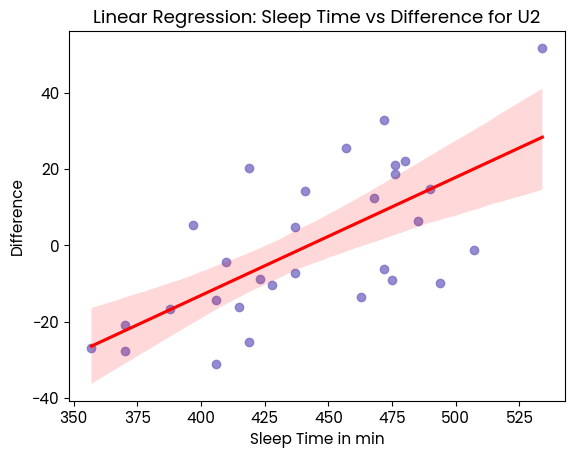

In [58]:
import seaborn as sns

# Filter df to include only user 2
df_user2 = df[df['is_U2'] == 1]

# Define the predictor variable (Sleep Time in min)
X = df_user2['sleep_time_in_min']

# Define the dependent variable (difference)
Y = difference_U2

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Label the x-axis
plt.xlabel('Sleep Time in min')

# Label the y-axis
plt.ylabel('Difference')

# Add a title
plt.title('Linear Regression: Sleep Time vs Difference for U2')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_U2_sleep_time_and_difference.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### OLS Model for Sleep Time vs. Difference for User 2

In [59]:
# Filter df to include only user 2
df_user2 = df[df['is_U2'] == 1]

# Define the predictor variable (Research Date)
X = df_user2['sleep_time_in_min']

# Set 'peak_brain_level' as the dependent variable
y = difference_U2

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     23.68
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.00e-05
Time:                        07:38:30   Log-Likelihood:                -122.91
No. Observations:                  30   AIC:                             249.8
Df Residuals:                      28   BIC:                             252.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -136.9927     28.28

## Find fitted values for user 3

In [ ]:
from scipy.optimize import curve_fit

# Filter data to include only user 3
df_user3 = df[df['is_U3'] == 1]

# Define the form of the function you want to fit to our data
# In this case, it's a cube root function (x ** (1/3)) with parameters a and b (a * (x ** (1/3)) + b)
def func_u3(x, a, b):
  return a * np.cbrt(x) + b

# Set up our data
# x_data_u3 is our independent variable (Research Date) for User 3
# y_data_u3 is our dependent variable (peak brain level) for User 3
x_data_u3 = df_user3['Research_Date']
y_data_u3 = df_user3['peak_brain_level']

# Use curve_fit to find the best fit parameters for User 3
popt_u3, pcov_u3 = curve_fit(func_u3, x_data_u3, y_data_u3)

# popt_u3 contains the optimal values for a and b
print("a = ", popt_u3[0])
print("b = ", popt_u3[1])

# Evaluate the fitted function at a specific x-value (x = 3 in this case) using the optimal parameters a and b found by curve_fit for User 3
y = func_u3(3, *popt_u3)
print("y = ", y)

a =  228.270925232984
b =  -5.334556041189468
y =  323.8890877897563


### Plot fitted function for user 3

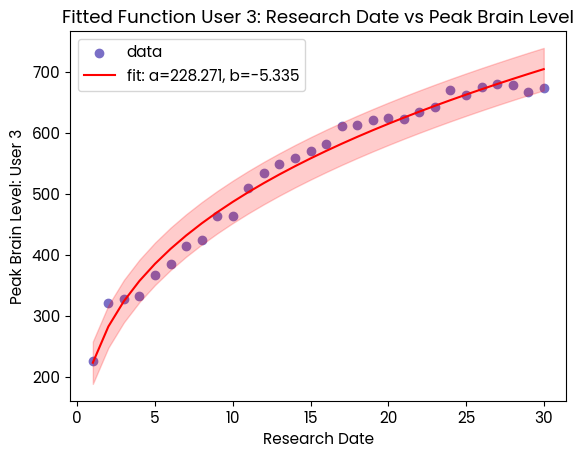

In [ ]:
# Generating a range of x values to plot the fitted function for User 3
x_fit_u3 = np.linspace(min(x_data_u3), max(x_data_u3), len(x_data_u3))

# Calculating the corresponding y values for the generated x values for User 3
y_fit_u3 = func_u3(x_fit_u3, *popt_u3)

# Calculate the residuals for User 3
residuals_u3 = y_data_u3 - func_u3(x_data_u3, *popt_u3)

# Estimate the standard deviation of the y-values for User 3
y_std_dev_u3 = np.sqrt(np.sum(residuals_u3**2) / len(x_data_u3))

# Calculate the confidence intervals (here, a 95% confidence interval) for User 3
ci_u3 = y_std_dev_u3 * 1.96

# Add/subtract the confidence interval from the fitted y-values for User 3
y_fit_upper_u3 = y_fit_u3 + ci_u3
y_fit_lower_u3 = y_fit_u3 - ci_u3

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Plot the original data as a scatter plot
ax.scatter(x_data_u3, y_data_u3, label='data')

# Plot the fitted function
ax.plot(x_fit_u3, y_fit_u3, 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt_u3))

# Plot the confidence intervals
ax.fill_between(x_fit_u3, y_fit_lower_u3, y_fit_upper_u3, color='r', alpha=0.2)

# Label the x-axis
plt.xlabel('Research Date')

# Label the y-axis
plt.ylabel('Peak Brain Level: User 3')

# Add a legend
ax.legend()

# Add a title
plt.title('Fitted Function User 3: Research Date vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_fitted_U3_research_date_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Show the plot
plt.show()

### OLS Model for fitted values for user 3

In [ ]:
# Use the optimal parameters to compute the fitted y-values for the data for User 3.
y_fitted_u3 = func_u3(x_data_u3, *popt_u3)

# The statsmodels library requires the independent variable to be a two-dimensional array, 
# so we add a column of ones to our x_data array using the add_constant function. 
# This will also include an intercept term in the OLS model.
X_data_u3 = sm.add_constant(x_data_u3)

# Fit an ordinary least squares (OLS) regression model to the x_data and the fitted y-values for User 3.
model_u3 = sm.OLS(y_fitted_u3, X_data_u3).fit()

# Print the summary of the OLS regression model for User 3, which includes statistical measures such as R-squared, the coefficient estimates, and standard errors.
print(model_u3.summary())

                            OLS Regression Results                            
Dep. Variable:          Research_Date   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     439.7
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.17e-18
Time:                        18:01:19   Log-Likelihood:                -146.06
No. Observations:                  30   AIC:                             296.1
Df Residuals:                      28   BIC:                             298.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           312.9076     12.205     25.638

### Calculate the difference between the expected values of the line (fitted value) and the actual values for user 1

In [ ]:
# Calculate fitted values (expected y-values) for all x_data_u3
y_fitted_u3 = func(x_data_u3, *popt_u3)

# Calculate the difference between the fitted values and the actual y_data_u3
difference_U3 = y_data_u3 - y_fitted_u3

# Print the difference
print(difference_U3)

1      3.063631
2     37.731212
3      3.110912
4    -24.022951
5    -19.003235
6    -24.461243
7    -17.332015
8    -27.207294
9     -6.488103
10   -23.460244
11     6.664563
12    16.724597
13    16.593211
14    14.169151
15    11.370044
16    12.127868
17    28.385728
18    19.095493
19    16.216043
20     9.711935
21    -1.447618
22    -1.289555
23    -1.837591
24    16.887268
25    -0.133678
26     4.082838
27     0.521780
28    -9.830418
29   -28.986048
30   -30.956283
dtype: float64


In [ ]:
mean_U3 = difference_U3.mean()
print(mean_U3)

-1.4210854715202004e-13


In [ ]:
# Filter df to include only user 3
df_user3 = df[df['is_U3'] == 1]

# Calculate the correlation
correlation = df_user3['sleep_time_in_min'].corr(difference_U3)

# Print the correlation
print(correlation)

0.7600864836107785


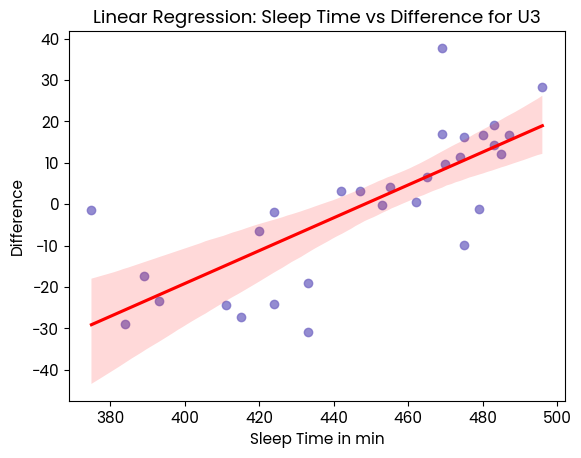

In [ ]:
# Filter df to include only user 3
df_user3 = df[df['is_U3'] == 1]

# Define the predictor variable (Sleep Time in min)
X = df_user3['sleep_time_in_min']

# Define the dependent variable (difference)
Y = difference_U3

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Label the x-axis
plt.xlabel('Sleep Time in min')

# Label the y-axis
plt.ylabel('Difference')

# Add a title
plt.title('Linear Regression: Sleep Time vs Difference for U3')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_U3_sleep_time_and_difference.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### OLS Model for Sleep Time vs. Difference for User 3

In [ ]:
# Filter df to include only user 1
df_user3 = df[df['is_U3'] == 1]

# Define the predictor variable (Research Date)
X = df_user3['sleep_time_in_min']

# Set 'peak_brain_level' as the dependent variable
y = difference_U3

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     38.31
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.10e-06
Time:                        18:03:51   Log-Likelihood:                -115.88
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -178.0841     28.85

## 1.2. MLR - Multiple Linear Regression Hypothesis 1

In [ ]:
# Set the independent variables
X = df[['Research_Date', 'sleep_time_in_min']]

# Set 'peak_brain_level' as the dependent variable
y = df['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 14 May 2023   Prob (F-statistic):           8.31e-32
Time:                        18:04:02   Log-Likelihood:                -503.97
No. Observations:                  90   AIC:                             1014.
Df Residuals:                      87   BIC:                             1021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               398.6529     64.92

**Interpretation for MLR with Peak Brain Level vs. Research Dates and Sleep Time in Min.**

* Intercepts: The intercept (const) of the model is 398.6529. This can be 
interpreted as the predicted value of the peak_brain_level when both Research_Date and sleep_time_in_min are zero.
* Slopes: The slope for Research_Date is 15.5941, and for sleep_time_in_min, it's -0.1339. This means that for each unit increase in Research_Date, we expect peak_brain_level to increase by 15.5941, assuming sleep_time_in_min is held constant. Conversely, for each unit increase in sleep_time_in_min, we expect peak_brain_level to decrease by 0.1339, assuming Research_Date is held constant.
* R-squared: The R-squared value of the MLR model is 0.807, which means that about 80.7% of the variability in peak_brain_level can be explained by Research_Date and sleep_time_in_min.
* Adj. R-squared: The adjusted R-squared value is 0.803. This metric adjusts the R-squared value based on the number of predictors in the model. It penalizes the addition of uninformative predictors.

**Comparison to the previous OLS Model with only one independent variable**
* Intercepts: The intercept of the MLR model is higher than the SLR model (398.6529 vs. 342.7126). This suggests that the effect of including sleep_time_in_min in the model has raised the baseline peak_brain_level.
* Slopes: The slope of Research_Date in the MLR model is slightly higher than the SLR model (15.5941 vs. 15.4379), indicating a slightly stronger association with peak_brain_level when accounting for sleep_time_in_min.
* R-squared: The R-squared value is slightly higher in the MLR model than the SLR model (0.807 vs. 0.805), suggesting that the MLR model explains a bit more variability in peak_brain_level.
* Adj. R-squared: The adjusted R-squared value is the same in both models (0.803), indicating that the addition of sleep_time_in_min as a predictor does not substantially improve the model fit when considering the penalty for additional predictors.
* Overall, the inclusion of sleep_time_in_min in the MLR model doesn't seem to substantially improve the model's performance over the SLR model. The p-value for sleep_time_in_min is also not statistically significant (p = 0.379), suggesting that sleep_time_in_min may not be a meaningful predictor of peak_brain_level in this model





# 2. Hypothesis 2 analysis

**Sleep (deep sleep and REM sleep in particular) has a significant impact on cognitive abilities**




## 2.1 OLR - Optimal Linear Regression Hypothesis 2


### Sleep Time in min vs. Peak Brain Level

In [ ]:
# Set the independent variable
X = df['sleep_time_in_min']

# Set the dependent variable
y = df['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.044
Date:                Sun, 14 May 2023   Prob (F-statistic):              0.156
Time:                        18:55:55   Log-Likelihood:                -576.97
No. Observations:                  90   AIC:                             1158.
Df Residuals:                      88   BIC:                             1163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               375.5358    145.25

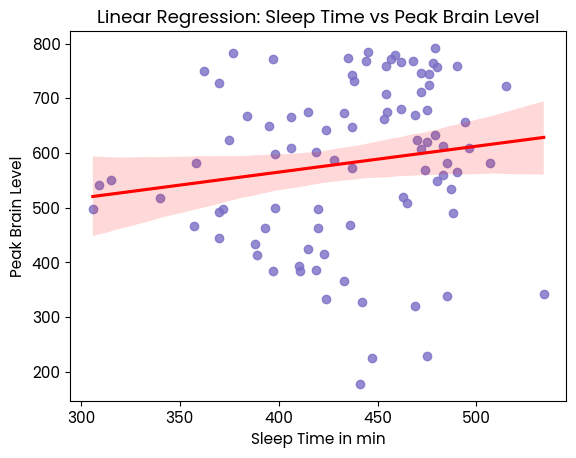

In [ ]:
# Define the predictor variable
X = df['sleep_time_in_min']

# Define the dependent variable
Y = df['peak_brain_level']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Label the x-axis
plt.xlabel('Sleep Time in min')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a title
plt.title('Linear Regression: Sleep Time vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_sleep_time_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### REM Sleep Percentage vs. Peak Brain Level




In [61]:
# Set the independent variable
X = df['REM_perc']

# Set the dependent variable
y = df['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.256
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0746
Time:                        07:42:41   Log-Likelihood:                -576.37
No. Observations:                  90   AIC:                             1157.
Df Residuals:                      88   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        523.4693     35.989     14.545      0.0

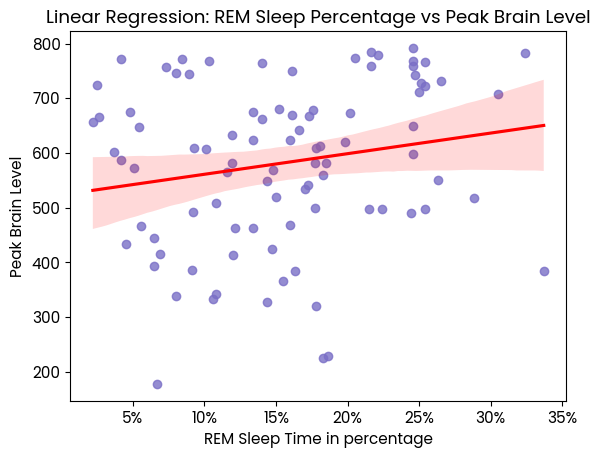

In [ ]:
from matplotlib.ticker import FuncFormatter

# Define the predictor variable
X = df['REM_perc']

# Define the dependent variable
Y = df['peak_brain_level']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a title
plt.title('Linear Regression: REM Sleep Percentage vs Peak Brain Level')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_rem_perc_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### REM Sleep Percentage vs. Problem Solving Category

In [ ]:
# Set the independent variable
X = df['REM_perc']

# Set the dependent variable
y = df['cat_prob_solv']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          cat_prob_solv   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 14 May 2023   Prob (F-statistic):            0.00200
Time:                        14:42:57   Log-Likelihood:                -597.68
No. Observations:                  90   AIC:                             1199.
Df Residuals:                      88   BIC:                             1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        373.7655     45.606      8.196      0.0

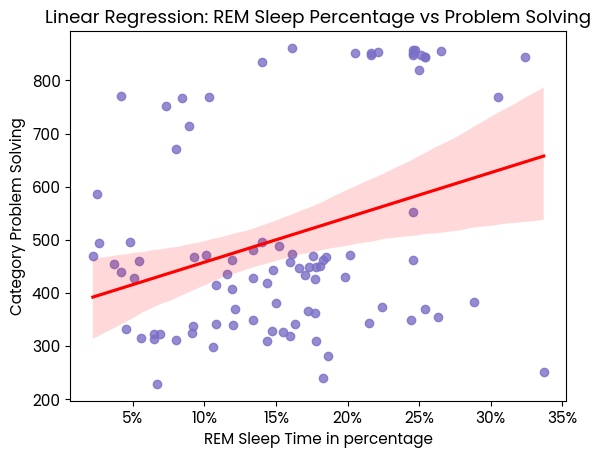

In [ ]:
# Define the predictor variable
X = df['REM_perc']

# Define the dependent variable
Y = df['cat_prob_solv']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Problem Solving')

# Add a title
plt.title('Linear Regression: REM Sleep Percentage vs Problem Solving')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_REM_sleep_perc_cat_prob_solv.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### REM Sleep Percentage vs. Categroy Mental Agility

In [ ]:
# Set the independent variable
X = df['REM_perc']

# Set the dependent variable
y = df['cat_mental_agility']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cat_mental_agility   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.654
Date:                Sun, 14 May 2023   Prob (F-statistic):             0.0196
Time:                        14:48:18   Log-Likelihood:                -583.94
No. Observations:                  90   AIC:                             1172.
Df Residuals:                      88   BIC:                             1177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.6347     39.151     14.167      0.0

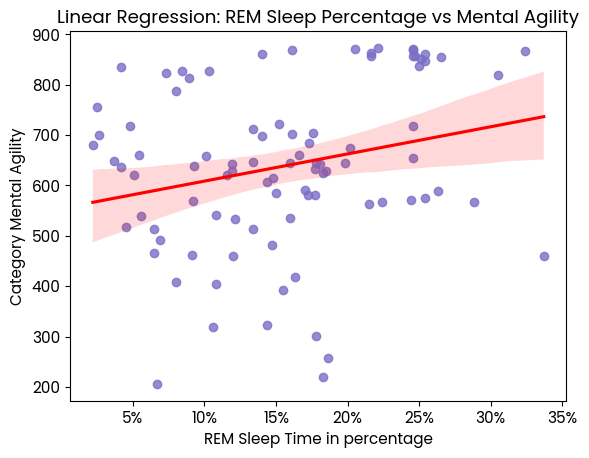

In [ ]:
# Define the predictor variable
X = df['REM_perc']

# Define the dependent variable
Y = df['cat_mental_agility']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Mental Agility')

# Add a title
plt.title('Linear Regression: REM Sleep Percentage vs Mental Agility')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_REM_sleep_perc_cat_mental_agility.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### Awake Sleep Percentage vs. Category Focus

In [ ]:
# Set the independent variable
X = df['awake_sleep_perc']

# Set the dependent variable
y = df['cat_focus']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cat_focus   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     11.72
Date:                Sun, 14 May 2023   Prob (F-statistic):           0.000940
Time:                        14:57:44   Log-Likelihood:                -580.47
No. Observations:                  90   AIC:                             1165.
Df Residuals:                      88   BIC:                             1170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              755.3304     28.546  

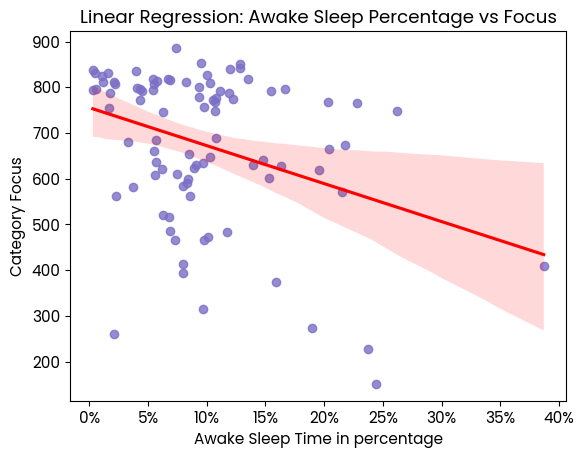

In [ ]:
# Set the independent variable
X = df['awake_sleep_perc']

# Set the dependent variable
Y = df['cat_focus']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('Awake Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Focus')

# Add a title
plt.title('Linear Regression: Awake Sleep Percentage vs Focus')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_awake_sleep_perc_cat_focus.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### Awake Sleep Percentage vs. Category Memory

In [ ]:
# Set the independent variable
X = df['awake_sleep_perc']

# Set the dependent variable
y = df['cat_memory']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             cat_memory   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.532
Date:                Sun, 14 May 2023   Prob (F-statistic):             0.0209
Time:                        15:00:32   Log-Likelihood:                -556.80
No. Observations:                  90   AIC:                             1118.
Df Residuals:                      88   BIC:                             1123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              558.1687     21.946  

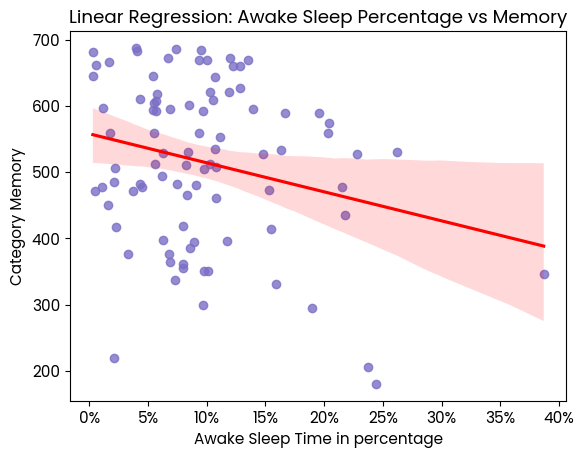

In [ ]:
# Set the independent variable
X = df['awake_sleep_perc']

# Set the dependent variable
Y = df['cat_memory']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval
sns.regplot(x=X, y=Y, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('Awake Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Memory')

# Add a title
plt.title('Linear Regression: Awake Sleep Percentage vs Memory')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_awake_sleep_perc_cat_memory.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

## Checking Hypothesis 2 for user 1 and user 2
* In the analysis of sleep times and phases for each user, it can be clearly seen that especially user 1 has the largest share of REM sleep, while user 2 has the smallest share.
* In the next section, we will take a closer look at whether it has some influence on cognitive abilities.

### User 1: REM Sleep % vs. Peak Brain Level

In [62]:
# Set the independent variable for user 1
X_user1 = df_user1['REM_perc']

# Set the dependent variable for user 1
y_user1 = df_user1['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X_user1 = sm.add_constant(X_user1)

# Fit an Ordinary Least Squares (OLS) regression model to the user 1 data
model_user1 = sm.OLS(y_user1, X_user1).fit()

# Display the model summary statistics for user 1
print(model_user1.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                  0.008789
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.926
Time:                        07:43:05   Log-Likelihood:                -187.24
No. Observations:                  30   AIC:                             378.5
Df Residuals:                      28   BIC:                             381.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        664.3646    122.427      5.427      0.0

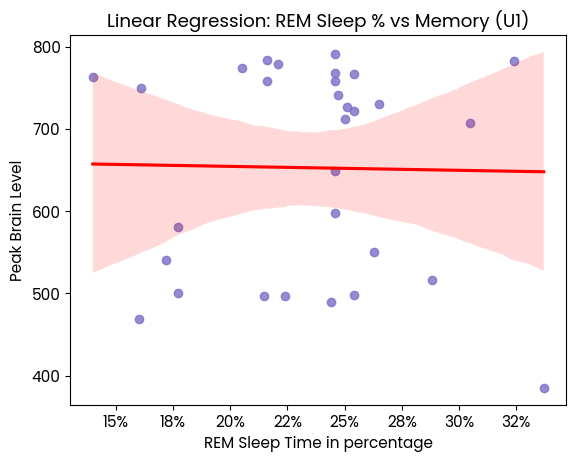

In [65]:
# Set the independent variable for user 1
X_user1 = df_user1['REM_perc']

# Set the dependent variable for user 1
Y_user1 = df_user1['peak_brain_level']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval for user 1
sns.regplot(x=X_user1, y=Y_user1, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a title
plt.title('Linear Regression: REM Sleep % vs Memory (U1)')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_u1_REM_perc_peak_brain_Level.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### User 2: REM Sleep % vs. Peak Brain Level

In [66]:
# Set the independent variable for user 2
X_user2 = df_user2['REM_perc']

# Set the dependent variable for user 2
y_user2 = df_user2['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X_user2 = sm.add_constant(X_user2)

# Fit an Ordinary Least Squares (OLS) regression model to the user 2 data
model_user2 = sm.OLS(y_user2, X_user2).fit()

# Display the model summary statistics for user 2
print(model_user2.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.418
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0751
Time:                        07:48:41   Log-Likelihood:                -193.56
No. Observations:                  30   AIC:                             391.1
Df Residuals:                      28   BIC:                             393.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        668.1562     66.977      9.976      0.0

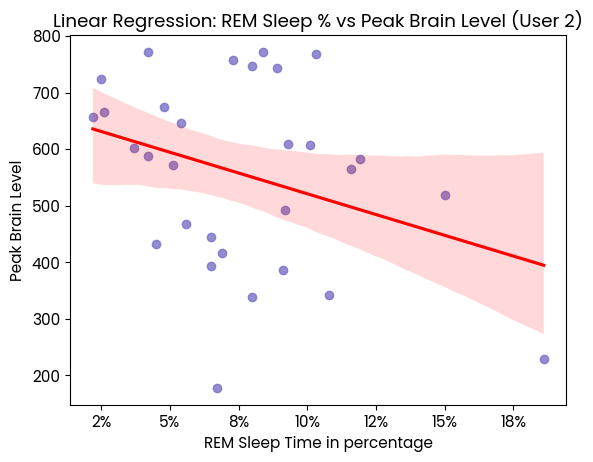

In [67]:
# Set the independent variable for user 2
X_user2 = df_user2['REM_perc']

# Set the dependent variable for user 2
Y_user2 = df_user2['peak_brain_level']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval for user 2
sns.regplot(x=X_user2, y=Y_user2, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Peak Brain Level')

# Add a title
plt.title('Linear Regression: REM Sleep % vs Peak Brain Level (User 2)')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_u2_REM_perc_peak_brain_level.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### User 1: REM Sleep % vs. Category Memory

In [68]:
# Set the independent variable for user 1
X_user1 = df_user1['REM_perc']

# Set the dependent variable for user 1 (Category Memory)
y_user1 = df_user1['cat_memory']

# Add a constant term to the independent variable (for the Y-intercept)
X_user1 = sm.add_constant(X_user1)

# Fit an Ordinary Least Squares (OLS) regression model to the user 1 data
model_user1 = sm.OLS(y_user1, X_user1).fit()

# Display the model summary statistics for user 1
print(model_user1.summary())

                            OLS Regression Results                            
Dep. Variable:             cat_memory   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                  0.002401
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.961
Time:                        07:53:52   Log-Likelihood:                -176.89
No. Observations:                  30   AIC:                             357.8
Df Residuals:                      28   BIC:                             360.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        574.4375     86.726      6.624      0.0

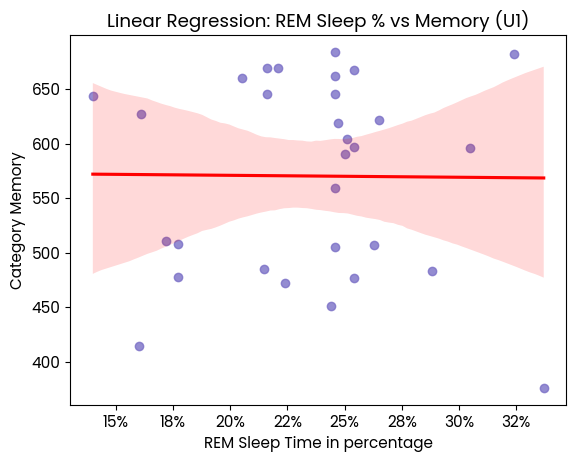

In [69]:
# Set the independent variable for user 1
X_user1 = df_user1['REM_perc']

# Set the dependent variable for user 1
Y_user1 = df_user1['cat_memory']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval for user 1
sns.regplot(x=X_user1, y=Y_user1, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Memory')

# Add a title
plt.title('Linear Regression: REM Sleep % vs Memory (U1)')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_u1_REM_perc_cat_memory.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

### User 2: REM Sleep % vs. Category Memory

In [70]:
# Set the independent variable for user 2
X_user2 = df_user2['REM_perc']

# Set the dependent variable for user 2 (Category Memory)
y_user2 = df_user2['cat_memory']

# Add a constant term to the independent variable (for the Y-intercept)
X_user2 = sm.add_constant(X_user2)

# Fit an Ordinary Least Squares (OLS) regression model to the user 2 data
model_user2 = sm.OLS(y_user2, X_user2).fit()

# Display the model summary statistics for user 2
print(model_user2.summary())

                            OLS Regression Results                            
Dep. Variable:             cat_memory   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     3.705
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0645
Time:                        07:57:02   Log-Likelihood:                -190.89
No. Observations:                  30   AIC:                             385.8
Df Residuals:                      28   BIC:                             388.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        607.6287     61.263      9.918      0.0

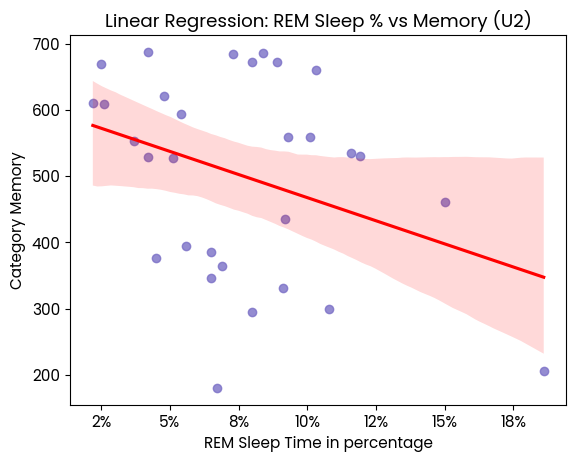

In [71]:
# Set the independent variable for user 2
X_user2 = df_user2['REM_perc']

# Set the dependent variable for user 2 (Category Memory)
Y_user2 = df_user2['cat_memory']

# Create a new figure and a set of subplots
fig, ax = plt.subplots()

# Use Seaborn's regplot function to plot the data and the fitted regression line with confidence interval for user 2
sns.regplot(x=X_user2, y=Y_user2, ci=95, line_kws={'color': 'red'}, ax=ax)

# Define a function that will convert decimals to percentages
def to_percent(value, _):
    return f'{value * 100:.0f}%'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(to_percent))

# Label the x-axis
plt.xlabel('REM Sleep Time in percentage')

# Label the y-axis
plt.ylabel('Category Memory')

# Add a title
plt.title('Linear Regression: REM Sleep % vs Memory (U2)')

# Save the plot as a .png file with a transparent background
plt.savefig('/content/gdrive/My Drive/Grp5_Data_Analysis_Project/Grp5_Visualisation/plot_regression_u2_REM_perc_cat_memory.png', format='png', dpi=300, transparent=True)

# Display the plot
plt.show()

## 2.2 MLR - Multiple Linear Regression Hypothesis 2

In [ ]:
# Set the independent variables
X = df[['sleep_time_in_min', 'REM_perc', 'deep_sleep_perc', 'light_core_sleep_perc']]

# Set 'peak_brain_level' as the dependent variable
y = df['peak_brain_level']

# Add a constant term to the independent variable (for the Y-intercept)
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model to the data
model = sm.OLS(y,X).fit()

# Display the model summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       peak_brain_level   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.667
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.165
Time:                        14:53:03   Log-Likelihood:                -574.60
No. Observations:                  90   AIC:                             1159.
Df Residuals:                      85   BIC:                             1172.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   315.68

# Cluster Analysis

* To perform k-means clustering on our dataframe, we first need to select the columns that we want to use for clustering. 
* Four our data, it seems like the variables related to sleep phases and brain activity (awake_sleep_perc, REM_perc, light_core_sleep_perc, deep_sleep_perc, peak_brain_level) could be good candidates for clustering.

In [ ]:
from sklearn.cluster import KMeans

# Select the columns for clustering
columns = ['peak_brain_level', 'sleep_time_in_min']

# Create a new dataframe with the selected columns
data = df[columns]

# Perform k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

# Add the cluster labels to the dataframe
df['cluster'] = clusters

# Print the cluster assignments
print(df[['Research_Date', 'cluster']])

    Research_Date  cluster
1               1        1
2               2        2
3               3        2
4               4        2
5               5        2
..            ...      ...
26             26        0
27             27        0
28             28        0
29             29        0
30             30        0

[90 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


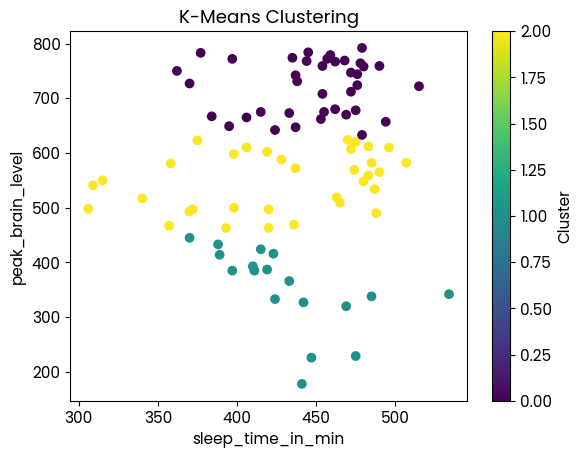

In [ ]:
# Select the columns for plotting
x_variable = 'sleep_time_in_min'
y_variable = 'peak_brain_level'

# Create a scatter plot with cluster coloring
plt.scatter(df[x_variable], df[y_variable], c=df['cluster'], cmap='viridis')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

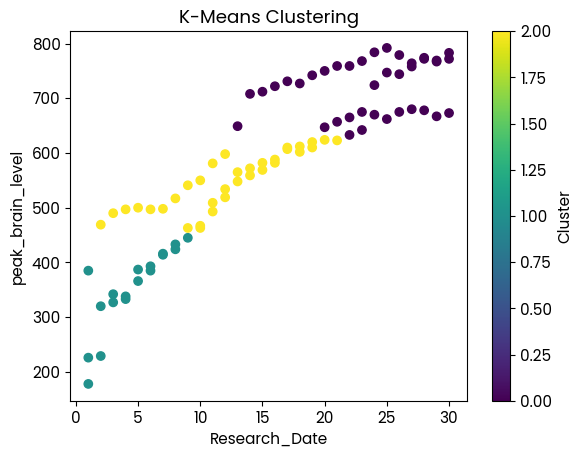

In [ ]:
# Select the columns for plotting
x_variable = 'Research_Date'
y_variable = 'peak_brain_level'

# Create a scatter plot with cluster coloring
plt.scatter(df[x_variable], df[y_variable], c=df['cluster'], cmap='viridis')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

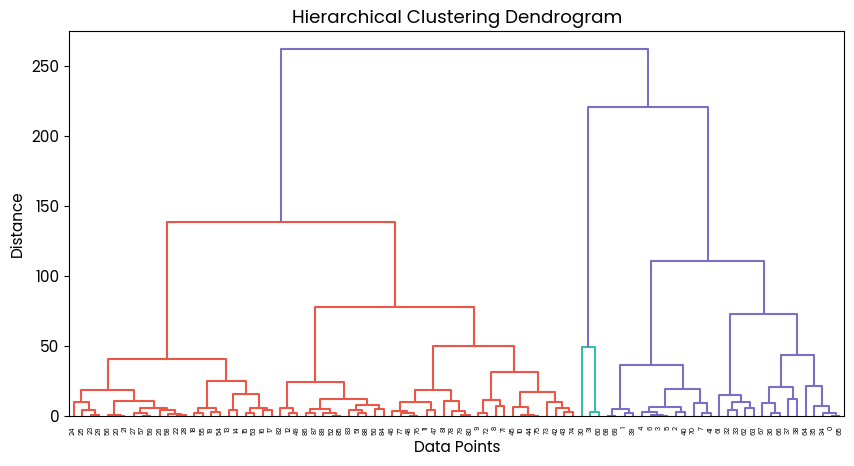

In [ ]:
import scipy.cluster.hierarchy as sch

# Select the columns for clustering
selected_columns = ['REM_perc', 'peak_brain_level']

# Perform hierarchical clustering
Z = sch.linkage(df[selected_columns], method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

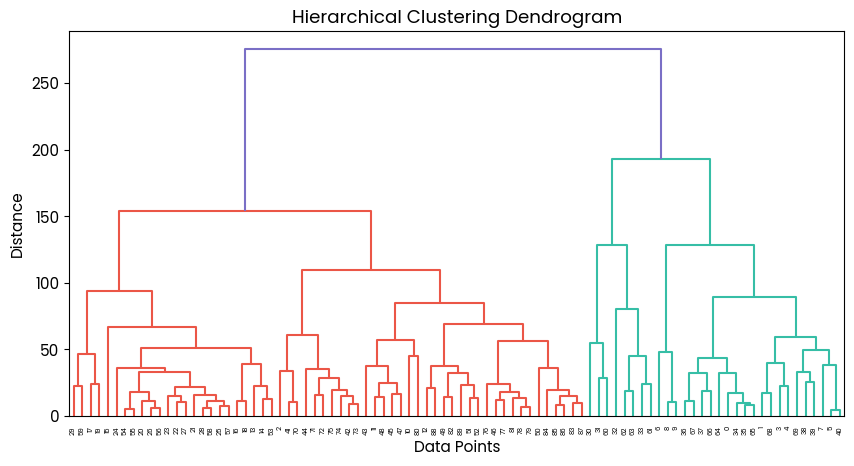

In [ ]:
# Select the columns for clustering
selected_columns = ['sleep_time_in_min', 'peak_brain_level']

# Perform hierarchical clustering
Z = sch.linkage(df[selected_columns], method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

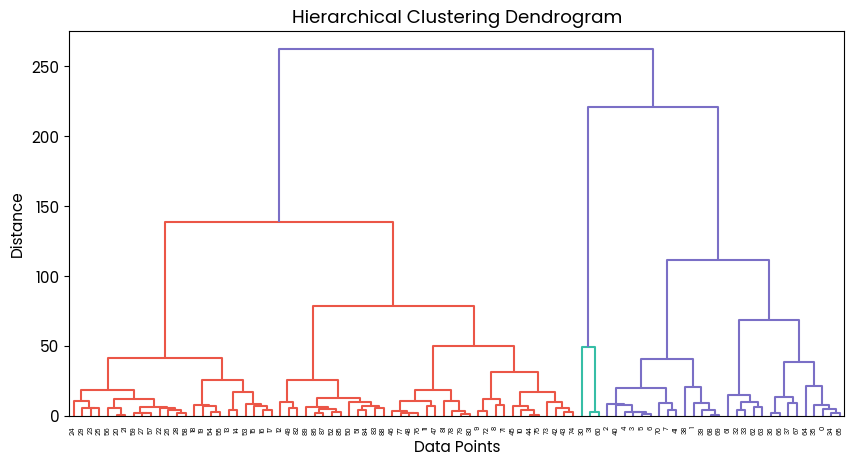

In [ ]:
# Select the columns for clustering
selected_columns = ['Research_Date', 'peak_brain_level']

# Perform hierarchical clustering
Z = sch.linkage(df[selected_columns], method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()